In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from rulefit import RuleFit
import scikit_posthocs as sp
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [296]:
import dice_ml
from dice_ml.utils import helpers  # helper functions

In [2]:
import shap

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [82]:
import Orange


ValueError: PyCapsule_GetPointer called with incorrect name

Artigo sobre métricas: https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Há nenhum valor nulo (Missing Value)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


O valor mais frequente na base de dados em relação a fumante é "Não". Se a pessoa for fumante, isso aumenta o preço?

In [298]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribuição do gênero dos beneficiários')

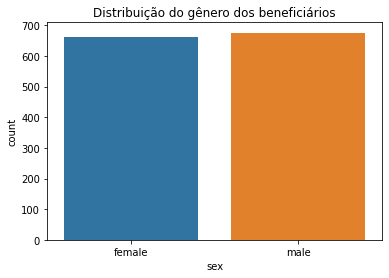

In [12]:
sns.countplot(df.sex)
plt.title('Distribuição do gênero dos beneficiários')

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribuição do número de dependentes')

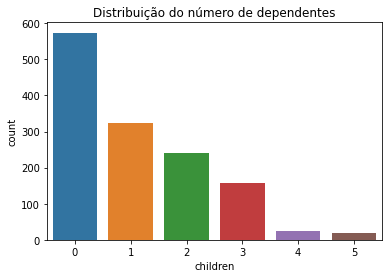

In [13]:
sns.countplot(df.children)
plt.title('Distribuição do número de dependentes')

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribuição de beneficiários fumantes')

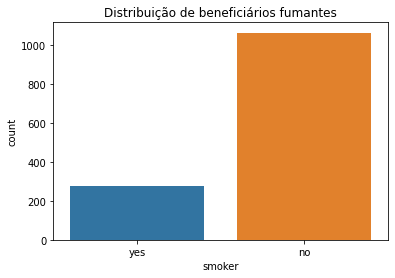

In [14]:
sns.countplot(df.smoker)
plt.title('Distribuição de beneficiários fumantes')

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribuição da região dos beneficiários')

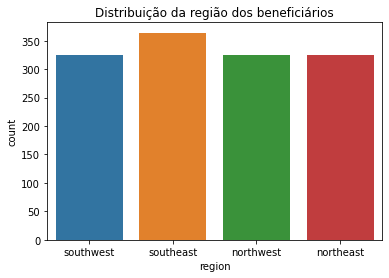

In [15]:
sns.countplot(df.region)
plt.title('Distribuição da região dos beneficiários')

Text(0.5, 1.0, 'Distribuição das idades dos beneficiários')

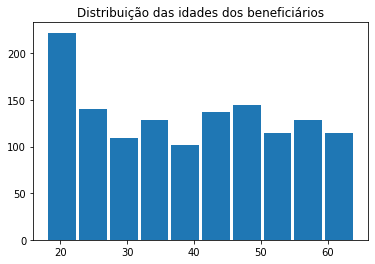

In [16]:
plt.hist(df.age, rwidth=0.9)
plt.title('Distribuição das idades dos beneficiários')

Text(0.5, 1.0, 'Distribuição dos valores do seguro')

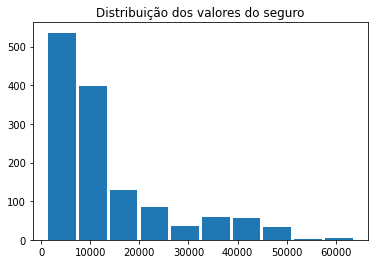

In [17]:
plt.hist(df.charges, rwidth=0.9)
plt.title('Distribuição dos valores do seguro')

Antes analisávamos se uma variável é normal ou não verificando se nela aparecia um "sininho", só visualmente. Neste caso não prece um sino

Text(0.5, 1.0, 'Distribuição do IMC dos beneficiários')

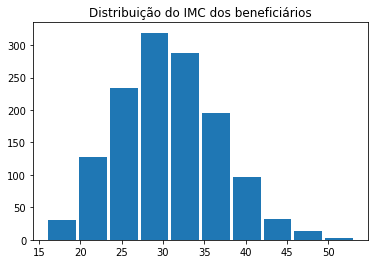

In [18]:
plt.hist(df.bmi, rwidth=0.9)
plt.title('Distribuição do IMC dos beneficiários')

In [19]:
# import pandas_profiling

# pandas_profiling.ProfileReport(df)

<AxesSubplot:xlabel='children', ylabel='charges'>

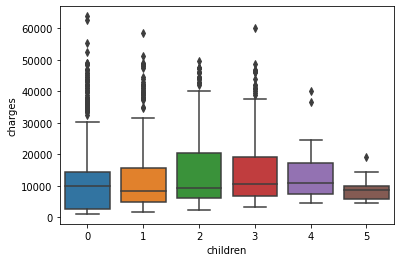

In [20]:
sns.boxplot(x='children',y='charges',data=df)

Text(0.5, 1.0, 'Valor do seguro X Idade do beneficiário')

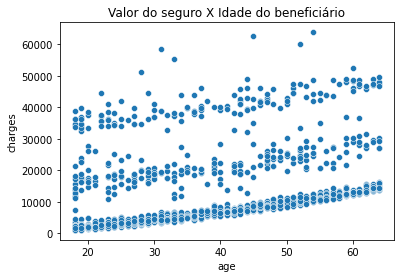

In [21]:
sns.scatterplot(x='age',y='charges',data=df)
plt.title('Valor do seguro X Idade do beneficiário')

Parace que há 3 tipos de seguro de vida, e os valores aumentam conforme a idade aumenta

## Tratando variáveis categóricas

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Como as variáveis não seguem uma ordem, irei utilizar o get_dummies mesmo

Text(0.5, 0.98, 'Disperção entre as variaveis')

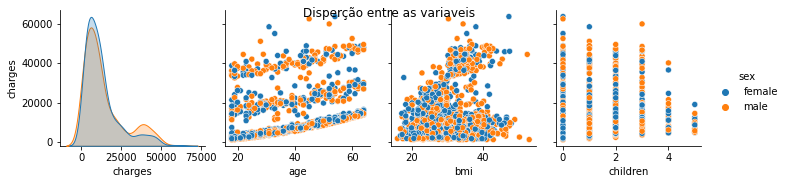

In [23]:
ax = sns.pairplot(df,y_vars='charges',x_vars=['charges','age','bmi','children'],hue='sex')
ax.fig.suptitle('Disperção entre as variaveis')

In [7]:
pd.get_dummies(df[['sex','smoker']])

,sex_female,sex_male,smoker_no,smoker_yes
0,1,0,0,1
1,0,1,1,0
2,0,1,1,0
3,0,1,1,0
4,0,1,1,0
...,...,...,...,...
1333,0,1,1,0
1334,1,0,1,0
1335,1,0,1,0
1336,1,0,1,0


In [8]:
dummies = pd.get_dummies(df[['sex','smoker','region']])
df_final = pd.concat([df, dummies], axis=1)

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
ages = pd.DataFrame(df_final['age'])

bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
ages['agerange'] = pd.cut(ages.age, bins, labels = labels,include_lowest = True)


In [11]:
df_final = pd.concat([df_final, ages], axis=1)

In [12]:
df_final

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,agerange
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1,19,18-29
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0,18,18-29
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0,28,18-29
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0,33,30-39
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0,32,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,0,0,1,0,0,50,40-49
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1,0,1,0,0,0,18,18-29
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,1,0,0,0,1,0,18,18-29
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,1,0,0,0,0,1,21,18-29


<AxesSubplot:xlabel='agerange', ylabel='charges'>

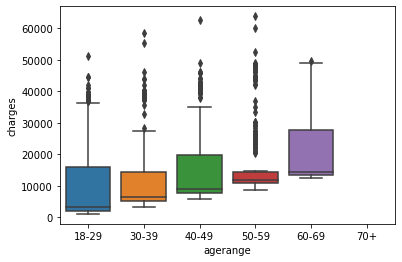

In [13]:
sns.boxplot(x='agerange',y='charges',data=df_final)

quanto mais vai aumentando a faixa etária da pessoa maior vai ficando o valor do seguro de vida

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Laur

TypeError: title() missing 1 required positional argument: 'label'

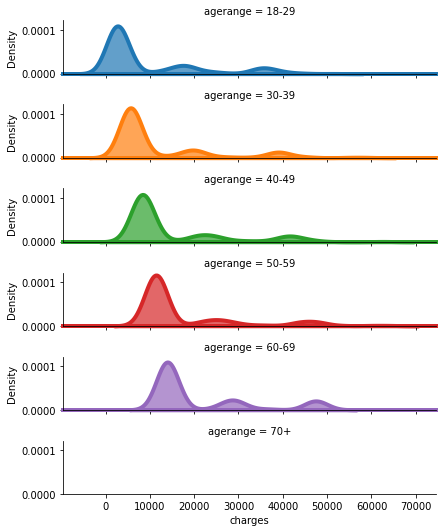

In [31]:
rp = sns.FacetGrid(df_final, row="agerange", hue="agerange", aspect=5, height=1.25)
  
rp.map(sns.kdeplot, 'charges', clip_on=False,
       shade=True, alpha=0.7, lw=4, bw=.2)
  
rp.map(plt.axhline, y=0, lw=4, clip_on=False)
plt.title()

In [14]:
dummies = pd.get_dummies(df_final['agerange'])
df_final = pd.concat([df_final, dummies], axis=1)
df_final.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,...,region_southeast,region_southwest,age,agerange,18-29,30-39,40-49,50-59,60-69,70+
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,...,0,1,19,18-29,1,0,0,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,...,1,0,18,18-29,1,0,0,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,...,1,0,28,18-29,1,0,0,0,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,...,0,0,33,30-39,0,1,0,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,...,0,0,32,30-39,0,1,0,0,0,0


In [15]:
df_final.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'age',
       'agerange', '18-29', '30-39', '40-49', '50-59', '60-69', '70+'],
      dtype='object')

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.


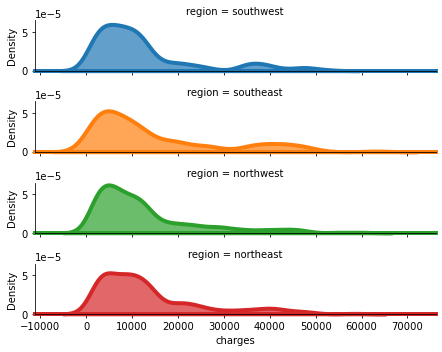

In [16]:
rp = sns.FacetGrid(df_final, row="region", hue="region", aspect=5, height=1.25)
  
rp.map(sns.kdeplot, 'charges', clip_on=False,
       shade=True, alpha=0.7, lw=4, bw=.2)
  
rp.map(plt.axhline, y=0, lw=4, clip_on=False)

Não teve muita diferença nos valores do seguro por região

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


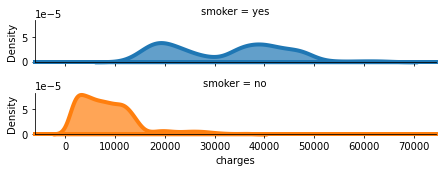

In [35]:
rp = sns.FacetGrid(df_final, row="smoker", hue="smoker", aspect=5, height=1.25)
  
rp.map(sns.kdeplot, 'charges', clip_on=False,
       shade=True, alpha=0.7, lw=4, bw=.2)
  
rp.map(plt.axhline, y=0, lw=4, clip_on=False)

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


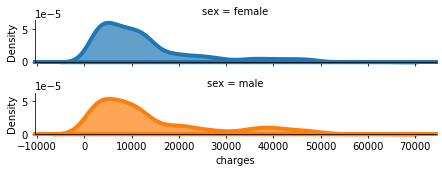

In [36]:
rp = sns.FacetGrid(df_final, row="sex", hue="sex", aspect=5, height=1.25)
  
rp.map(sns.kdeplot, 'charges', clip_on=False,
       shade=True, alpha=0.7, lw=4, bw=.2)
  
rp.map(plt.axhline, y=0, lw=4, clip_on=False)

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Laur

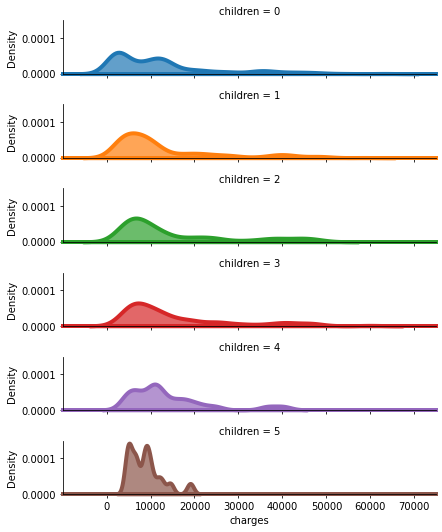

In [37]:
rp = sns.FacetGrid(df_final, row="children", hue="children", aspect=5, height=1.25)
  
rp.map(sns.kdeplot, 'charges', clip_on=False,
       shade=True, alpha=0.7, lw=4, bw=.2)
  
rp.map(plt.axhline, y=0, lw=4, clip_on=False)

Vi um leve deslocamento das ondas quando os filhos são acima de 4

In [ ]:
df_final['bmi'].unique()

De acordo com Center for Disease Control and Prevention: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html
        
- <18.5: Abaixo do peso
- acima de 30 & <34.9: Obeso
- acima de 35: Extremamente obeso

In [17]:
df_final.bmi.max()

53.13

In [18]:
bmi = pd.DataFrame(df_final['bmi'])

bins = [10, 18.5,  25, 30, 35, 55]
labels = ['-18.5','18.6-24.9','25-29.9','30-34.9', '35+']

# bins = [18, 30, 40, 50, 60, 70, 120]
# labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

bmi['bmirange'] = pd.cut(bmi.bmi, bins, labels = labels,include_lowest = True)
bmi

,bmi,bmirange
0,27.900,25-29.9
1,33.770,30-34.9
2,33.000,30-34.9
3,22.705,18.6-24.9
4,28.880,25-29.9
...,...,...
1333,30.970,30-34.9
1334,31.920,30-34.9
1335,36.850,35+
1336,25.800,25-29.9


In [19]:
bmi.bmirange.unique()

['25-29.9', '30-34.9', '18.6-24.9', '35+', '-18.5']
Categories (5, object): ['-18.5' < '18.6-24.9' < '25-29.9' < '30-34.9' < '35+']

In [20]:
df_final = pd.concat([df_final, bmi.bmirange], axis=1)

In [21]:
df_final

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,...,region_southwest,age,agerange,18-29,30-39,40-49,50-59,60-69,70+,bmirange
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,...,1,19,18-29,1,0,0,0,0,0,25-29.9
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,...,0,18,18-29,1,0,0,0,0,0,30-34.9
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,...,0,28,18-29,1,0,0,0,0,0,30-34.9
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,...,0,33,30-39,0,1,0,0,0,0,18.6-24.9
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,...,0,32,30-39,0,1,0,0,0,0,25-29.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,...,0,50,40-49,0,0,1,0,0,0,30-34.9
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1,...,0,18,18-29,1,0,0,0,0,0,30-34.9
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,1,...,0,18,18-29,1,0,0,0,0,0,35+
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,1,...,1,21,18-29,1,0,0,0,0,0,25-29.9


C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\projeto_ufabc\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Laur

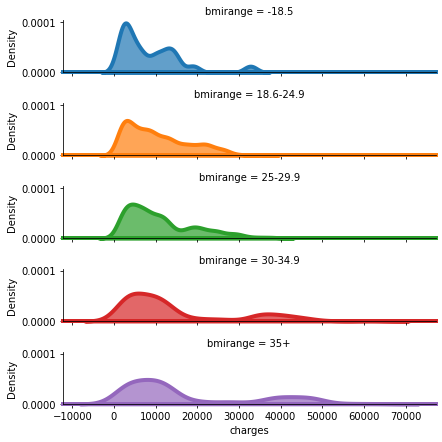

In [43]:
rp = sns.FacetGrid(df_final, row="bmirange", hue="bmirange", aspect=5, height=1.25)
  
rp.map(sns.kdeplot, 'charges', clip_on=False,
       shade=True, alpha=0.7, lw=4, bw=.2)
  
rp.map(plt.axhline, y=0, lw=4, clip_on=False)

In [427]:
df_final.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'age',
       'agerange', '18-29', '30-39', '40-49', '50-59', '60-69', '70+',
       'bmirange'],
      dtype='object')

In [435]:
df_final

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,...,region_southwest,age,agerange,18-29,30-39,40-49,50-59,60-69,70+,bmirange
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,...,1,19,18-29,1,0,0,0,0,0,25-29.9
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,...,0,18,18-29,1,0,0,0,0,0,30-34.9
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,...,0,28,18-29,1,0,0,0,0,0,30-34.9
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,...,0,33,30-39,0,1,0,0,0,0,18.6-24.9
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,...,0,32,30-39,0,1,0,0,0,0,25-29.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,...,0,50,40-49,0,0,1,0,0,0,30-34.9
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1,...,0,18,18-29,1,0,0,0,0,0,30-34.9
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,1,...,0,18,18-29,1,0,0,0,0,0,35+
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,1,...,1,21,18-29,1,0,0,0,0,0,25-29.9


Text(0.5, 1.0, 'Gráfico de correlação de Pearson entre as variáveis')

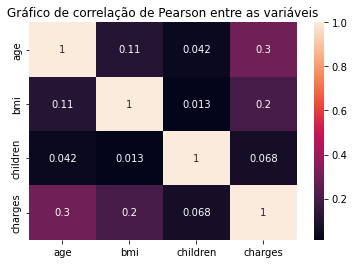

In [441]:
correlacao_data = df[['age','bmi', 'children','charges']]

sns.heatmap(correlacao_data.corr(), annot = True)
plt.title('Gráfico de correlação de Pearson entre as variáveis')

## Teste de Normalidade 

Segui o artigo da Alura: https://www.alura.com.br/conteudo/estatistica-testes-hipotestes

No nosso caso, ele está dizendo que a função normaltest testa a hipótese nula, que é o H0, vamos conhecer, de que a amostra é proveniente de uma distribuição normal. Essa é a hipótese nula. É isso que eu tenho que rejeitar ou aceitar de acordo com o que vamos obter de resultado do teste.

Validando se charges tem uma distribuição normal, através do teste de normalidade

In [18]:
from scipy.stats import normaltest

Significância, vou colocar dentro desta variável, eu vou dar 5%, 0,05. É aquela significância padrão, nível de confiança 95%

In [19]:
significancia = 0.05

In [20]:
stat_test, p_valor = normaltest(df.charges)
print(stat_test)
print(p_valor)


336.8851220567733
7.019807901276197e-74


In [21]:
p_valor <= significancia

True

Não é proveniente de uma distribuição normal, eu rejeito essa hipótese aqui totalmente. Visualmente a gente confirma isso e, agora, com uma estatística mais formal, a gente também confirma isso. Então provavelmente a Regressão linear não terá um bom desempenho

In [22]:
stat_test, p_valor = normaltest(df.bmi)
print(stat_test)
print(p_valor)


17.581447872784118
0.0001521377897266011


In [23]:
p_valor <= significancia

True

## Modelagem

- Regressão Linear
- Árvore de Regressão
- RuleFit 
- Gradient Boosting

Atenção: não use os parâmetros padrões dos modelos, utilize o procedimento de Grid Search para determinar os melhores parâmetros. Reporte a lista de valores testados para cada parâmetros.

1 tentativa (todas as variáveis):
- Range da idade
- Quantidade de filhos
- Smoker
- BMI
- Sex
- Region

2 tentativa:
- Range da idade
- Quantidade de filhos
- Smoker
- BMI

In [50]:
df_final.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'age',
       'agerange', '18-29', '30-39', '40-49', '50-59', '60-69', '70+',
       'bmirange'],
      dtype='object')

## Teste 1

In [22]:
y = df_final['charges']
X = df_final[['bmi', 'children','sex_female','sex_male','smoker_no','smoker_yes','region_northeast',
       'region_northwest', 'region_southeast','18-29', '30-39', '40-49', '50-59', '60-69', '70+']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)


## Teste 2

In [24]:
y_2 = df_final['charges']
X_2 = df_final[['bmi', 'children','smoker_no','smoker_yes','18-29', '30-39', '40-49', '50-59', '60-69', '70+']]

In [25]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=2811)


### Grid Search

In [ ]:

# decision_tree_reg = DecisionTreeRegressor()


# parameters = {"criterion": ["mse"],
#               "min_samples_split": [10, 20, 40],
#               "max_depth": [2, 6, 8],
#               "min_samples_leaf": [20, 40, 100],
#               "max_leaf_nodes": [5, 20, 100],
#               }

# dt_grid = GridSearchCV(decision_tree_reg,
#                         parameters,
#                         n_jobs = -1,
#                         verbose=True)

# dt_grid.fit(X_train,y_train)

# print(dt_grid.best_score_)
# print(dt_grid.best_params_)


In [ ]:

# gradient_boost_reg = GradientBoostingRegressor()


# parameters = {"criterion": ["mse"],
#     'max_depth': [2, 6, 8, 10],
#     'max_features': ["auto", "sqrt", "log2"],
#     'min_samples_leaf': [20, 40, 100],
#     'min_samples_split': [10, 20, 40],
#     'n_estimators': [100, 200, 300, 1000]}

# gb_grid = GridSearchCV(gradient_boost_reg,
#                         parameters,
#                         n_jobs = -1,
#                         verbose=True)

# gb_grid.fit(X_train,y_train)

# print(gb_grid.best_score_)
# print(gb_grid.best_params_)


In [ ]:
# rule_fit_reg = RuleFit()


# parameters = {
#     "model_type": ["rl", "r", "l"],
#     'max_rules': [100, 200,500],
#     'lin_trim_quantile': [0.05, 0.025, 0.075],
#     "exp_rand_tree_size":[True,False],
#     "tree_size":[5,8,10,20],
#     "rfmode":['regress']}


# rf_grid = GridSearchCV(rule_fit_reg,
#                         parameters,
#                         n_jobs = -1,
#                         verbose=True,
#                       scoring='neg_mean_squared_error')

# rf_grid.fit(X_train.values,y_train, feature_names=X.columns)

# print(rf_grid.best_score_)
# print(rf_grid.best_params_)


## GridSearch 2a tentativa

In [ ]:

# decision_tree_reg_2 = DecisionTreeRegressor()


# parameters = {"criterion": ["mse"],
#               "min_samples_split": [10, 20, 40],
#               "max_depth": [2, 6, 8],
#               "min_samples_leaf": [20, 40, 100],
#               "max_leaf_nodes": [5, 20, 100],
#               }

# dt_grid_2 = GridSearchCV(decision_tree_reg_2,
#                         parameters,
#                         n_jobs = -1,
#                         verbose=True)

# dt_grid_2.fit(X_train_2,y_train_2)

# print(dt_grid_2.best_score_)
# print(dt_grid_2.best_params_)


In [ ]:

# gradient_boost_reg_2 = GradientBoostingRegressor()


# parameters = {"criterion": ["mse"],
#     'max_depth': [2, 6, 8, 10],
#     'max_features': ["auto", "sqrt", "log2"],
#     'min_samples_leaf': [20, 40, 100],
#     'min_samples_split': [10, 20, 40],
#     'n_estimators': [100, 200, 300, 1000]}

# gb_grid_2 = GridSearchCV(gradient_boost_reg_2,
#                         parameters,
#                         n_jobs = -1,
#                         verbose=True)

# gb_grid_2.fit(X_train_2,y_train_2)

# print(gb_grid_2.best_score_)
# print(gb_grid_2.best_params_)


In [ ]:

# rule_fit_reg_2 = RuleFit()


# parameters = {
#     "model_type": ["rl", "r", "l"],
#     'max_rules': [100, 200,500],
#     'lin_trim_quantile': [0.05, 0.025, 0.075],
#     "exp_rand_tree_size":[True,False],
#     "tree_size":[5,8,10,20],
#     "rfmode":['regress']}


# rf_grid_2 = GridSearchCV(rule_fit_reg_2,
#                         parameters,
#                         n_jobs = -1,
#                         verbose=True,
#                       scoring='neg_mean_squared_error')

# rf_grid_2.fit(X_train_2.values,y_train_2, feature_names=X_2.columns)

# print(rf_grid_2.best_score_)
# print(rf_grid_2.best_params_)


### Features Importance

In [26]:
def feature_importance(features,model):
    # plt.barh(features, model_clf.feature_importances_)
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    model_importances = pd.Series(importance, index=features)
    # plot feature importance
    model_importances.plot.bar()
    plt.title("Feature importances using MDI")
    plt.ylabel("Mean decrease in impurity")
    plt.tight_layout()
#     pyplot.bar([x for x in range(len(importance))], importance)
#     pyplot.show()
    


### Regressão Linear

In [27]:
rl = LinearRegression()


In [28]:
rl.fit(X_train, y_train)


LinearRegression()

In [29]:
lm = rl.predict(X_test)


In [30]:
X.columns

Index(['bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast', '18-29',
       '30-39', '40-49', '50-59', '60-69', '70+'],
      dtype='object')

In [31]:
index = ['Intercept','bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']

In [32]:
pd.DataFrame(data=np.append(rl.intercept_,rl.coef_), index=index,columns=['Parametros'])


,Parametros
Intercept,11098.707519
bmi,310.378925
children,632.262709
sex_female,70.891189
sex_male,-70.891189
smoker_no,-12101.831554
smoker_yes,12101.831554
region_northeast,921.452120
region_northwest,878.599965
region_southeast,190.979708


In [34]:
print("R quadrado = {}".format(r2_score(y_test, lm).round(2)))

R quadrado = 0.73


In [35]:
print("MSE = {}".format(mean_squared_error(y_test, lm).round(2)))

MSE = 37091849.82


Para a predição de valores de unidade u, a unidade do MSE seria u².

In [37]:
print("Mape = {}".format(mean_absolute_percentage_error(y_test, lm)))

Mape = 0.44417419097547056


Por exemplo, ter um MAPE=12% significa que, em média, nosso modelo faz previsões que erram por 12% do valor real.

### Regressão Linear - Teste 2

In [38]:
rl_2 = LinearRegression()


In [39]:
rl_2.fit(X_train_2, y_train_2)


LinearRegression()

In [40]:
y_predict_rl_2 = rl_2.predict(X_test_2)


In [41]:
X_test_2.columns

Index(['bmi', 'children', 'smoker_no', 'smoker_yes', '18-29', '30-39', '40-49',
       '50-59', '60-69', '70+'],
      dtype='object')

In [42]:
index = ['Intercept','bmi', 'children', 'smoker_no', 'smoker_yes', '18-29', '30-39', '40-49',
       '50-59', '60-69', '70+']


In [43]:
pd.DataFrame(data=np.append(rl_2.intercept_,rl_2.coef_), index=index,columns=['Parametros'])


,Parametros
Intercept,11964.224671
bmi,297.650509
children,637.461921
smoker_no,-12095.730960
smoker_yes,12095.730960
18-29,-4816.219431
30-39,-3190.079832
40-49,-127.891624
50-59,3343.065573
60-69,4791.125314


In [44]:
print("R quadrado = {}".format(r2_score(y_test_2, y_predict_rl_2).round(2)))

R quadrado = 0.72


In [45]:
print("MSE = {}".format(mean_squared_error(y_test_2, y_predict_rl_2).round(2)))

MSE = 37222809.17


In [46]:
print("Mape = {}".format(mean_absolute_percentage_error(y_test_2, y_predict_rl_2)))

Mape = 0.44494701922632257


### Decision Tree

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=20, min_samples_leaf=20,
                      min_samples_split=10)
                                          

In [47]:
best_dt_model = DecisionTreeRegressor(max_depth=6, max_leaf_nodes=20, min_samples_leaf=20,
                      min_samples_split=10,random_state=591)

In [48]:
# best_dt_model = dt_grid.best_estimator_
best_dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=20, min_samples_leaf=20,
                      min_samples_split=10, random_state=591)

In [49]:
y_predict_dt = best_dt_model.predict(X_test)

Feature: 0, Score: 0.16133
Feature: 1, Score: 0.00313
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00134
Feature: 4, Score: 0.73671
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00145
Feature: 7, Score: 0.00154
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.06212
Feature: 10, Score: 0.02123
Feature: 11, Score: 0.00929
Feature: 12, Score: 0.00186
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000


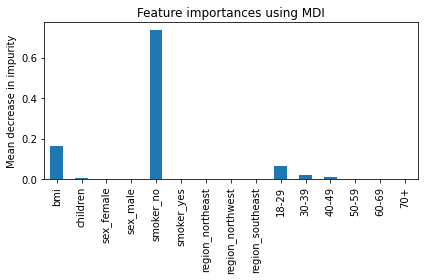

In [50]:
features = X.columns

feature_importance(features,best_dt_model)

In [51]:
print("R quadrado = {}".format(r2_score(y_test, y_predict_dt).round(2)))
print("MSE = {}".format(mean_squared_error(y_test, y_predict_dt).round(2)))

R quadrado = 0.84
MSE = 21829685.85


In [52]:
print("Mape = {}".format(mean_absolute_percentage_error(y_test, y_predict_dt)))

Mape = 0.31919297685566056


### Decision Tree - Teste 2

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=20, min_samples_leaf=20,
                      min_samples_split=10)

In [53]:
# best_dt_model_2 = dt_grid_2.best_estimator_
best_dt_model_2 = DecisionTreeRegressor(max_depth=6, max_leaf_nodes=20, min_samples_leaf=20,
                      min_samples_split=10)

best_dt_model_2.fit(X_train_2,y_train_2)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=20, min_samples_leaf=20,
                      min_samples_split=10)

In [54]:
y_predict_dt_2 = best_dt_model_2.predict(X_test_2)

Feature: 0, Score: 0.16304
Feature: 1, Score: 0.00488
Feature: 2, Score: 0.73748
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.06219
Feature: 5, Score: 0.02125
Feature: 6, Score: 0.00930
Feature: 7, Score: 0.00187
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


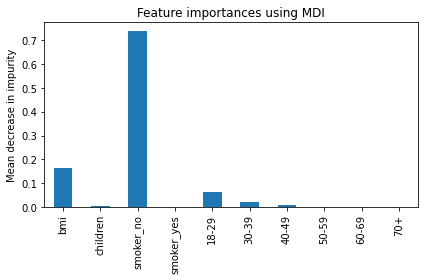

In [55]:
features = X_2.columns

feature_importance(features,best_dt_model_2)

In [56]:
print("R quadrado = {}".format(r2_score(y_test_2, y_predict_dt_2).round(2)))
print("MSE = {}".format(mean_squared_error(y_test_2, y_predict_dt_2).round(2)))

R quadrado = 0.84
MSE = 21372143.69


In [57]:
print("Mape = {}".format(mean_absolute_percentage_error(y_test_2, y_predict_dt_2)))

Mape = 0.32245688101224546


### Gradient Boosting 

{'criterion': 'mse', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 40, 'min_samples_split': 40, 'n_estimators': 100}

In [58]:
best_gb_model = GradientBoostingRegressor( criterion=  'mse', max_depth = 2, max_features = 'auto', min_samples_leaf = 40, min_samples_split =  40, n_estimators= 100, random_state=591)

best_gb_model.fit(X_train,y_train)

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error

GradientBoostingRegressor(criterion='mse', max_depth=2, max_features='auto',
                          min_samples_leaf=40, min_samples_split=40,
                          random_state=591)

In [59]:
# best_gb_model = gb_grid.best_estimator_
y_predict_gb = best_gb_model.predict(X_test)

Feature: 0, Score: 0.16100
Feature: 1, Score: 0.00519
Feature: 2, Score: 0.00043
Feature: 3, Score: 0.00037
Feature: 4, Score: 0.24278
Feature: 5, Score: 0.48968
Feature: 6, Score: 0.00102
Feature: 7, Score: 0.00109
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.04969
Feature: 10, Score: 0.01131
Feature: 11, Score: 0.00006
Feature: 12, Score: 0.01892
Feature: 13, Score: 0.01847
Feature: 14, Score: 0.00000


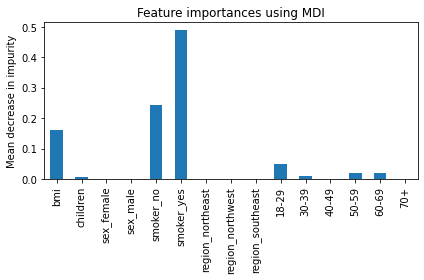

In [60]:
features = X.columns

feature_importance(features,best_gb_model)

In [61]:
print("R quadrado = {}".format(r2_score(y_test, y_predict_gb).round(2)))
print("MSE = {}".format(mean_squared_error(y_test, y_predict_gb).round(2)))

R quadrado = 0.86
MSE = 19492281.88


In [62]:
print("Mape = {}".format(mean_absolute_percentage_error(y_test, y_predict_gb)))

Mape = 0.3261140524878015


### Gradient Boosting - Teste 2

GradientBoostingRegressor('criterion': 'mse', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 40, 'min_samples_split': 10, 'n_estimators': 100)
    

In [63]:
best_gb_model_2 = GradientBoostingRegressor( criterion=  'mse', max_depth = 2, max_features = 'auto', min_samples_leaf = 40, min_samples_split =  10, n_estimators= 100, random_state=591)

best_gb_model_2.fit(X_train_2,y_train_2)

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error

GradientBoostingRegressor(criterion='mse', max_depth=2, max_features='auto',
                          min_samples_leaf=40, min_samples_split=10,
                          random_state=591)

In [64]:
# best_gb_model_2 = gb_grid_2.best_estimator_
y_predict_gb_2 = best_gb_model_2.predict(X_test_2)

Feature: 0, Score: 0.16134
Feature: 1, Score: 0.00528
Feature: 2, Score: 0.59134
Feature: 3, Score: 0.14350
Feature: 4, Score: 0.04957
Feature: 5, Score: 0.01130
Feature: 6, Score: 0.00020
Feature: 7, Score: 0.01889
Feature: 8, Score: 0.01858
Feature: 9, Score: 0.00000


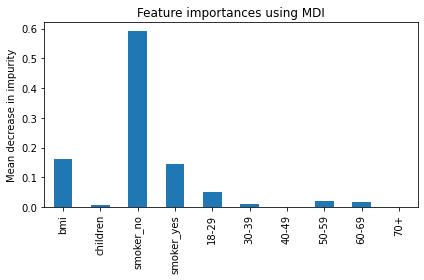

In [65]:
features = X_2.columns

feature_importance(features,best_gb_model_2)

In [66]:
print("R quadrado = {}".format(r2_score(y_test_2, y_predict_gb_2).round(2)))
print("MSE = {}".format(mean_squared_error(y_test_2, y_predict_gb_2).round(2)))

R quadrado = 0.86
MSE = 19382762.62


In [67]:
print("Mape = {}".format(mean_absolute_percentage_error(y_test_2, y_predict_gb_2)))

Mape = 0.31987244546871196


### RuleFit

{'exp_rand_tree_size': False, 'lin_trim_quantile': 0.05, 'max_rules': 200, 'model_type': 'rl', 'rfmode': 'regress', 'tree_size': 5}

In [68]:
best_rf_model = RuleFit(exp_rand_tree_size= False, lin_trim_quantile = 0.05, max_rules= 200, model_type = 'rl', rfmode= 'regress', tree_size= 5, random_state=591)
best_rf_model.fit(X_train.values,y_train, feature_names=X.columns)

RuleFit(exp_rand_tree_size=False, lin_trim_quantile=0.05, max_iter=1000,
        max_rules=200, random_state=591,
        tree_generator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=100,
                                                 max_leaf_nodes=5,
                                                 n_estimators=40,
                                                 random_state=591,
                                                 subsample=0.3029537419757909),
        tree_size=5)

In [69]:
# best_rf_model = rf_grid.best_estimator_
y_predict_rf = best_rf_model.predict(X_test.values)

In [295]:
rules = best_rf_model.get_rules()
rules = rules[rules.coef != 0].sort_values("importance", ascending=False)
rules.head(10)

,rule,type,coef,support,importance
15,bmi > 30.005000114440918 & smoker_no <= 0.5,rule,13056.070293,0.113074,4134.641829
4,smoker_no,linear,-9902.549075,1.000000,3998.602533
9,18-29,linear,-5735.185831,1.000000,2728.474265
65,bmi > 28.4399995803833 & smoker_yes > 0.5,rule,3877.061888,0.141343,1350.670550
26,60-69 <= 0.5 & smoker_no > 0.5 & 50-59 <= 0.5,rule,-2533.051858,0.586572,1247.396785
13,60-69,linear,4511.609769,1.000000,1163.062275
10,30-39,linear,-2854.137369,1.000000,1102.878818
1,children,linear,673.601423,1.000000,738.054732
27,smoker_no <= 0.5 & bmi > 36.85499954223633 & b...,rule,3323.511448,0.042403,669.708810
48,18-29 <= 0.5 & smoker_no > 0.5,rule,-985.822345,0.508834,492.834234


In [71]:
num_rules_rule = len(rules[rules.type == 'rule'])
num_rules_linear = len(rules[rules.type == 'linear'])
print(num_rules_rule)
print(num_rules_linear)

16
12


In [200]:
rules

,rule,type,coef,support,importance
15,bmi > 30.005000114440918 & smoker_no <= 0.5,rule,1.305607e+04,0.113074,4.134642e+03
4,smoker_no,linear,-9.902549e+03,1.000000,3.998603e+03
9,18-29,linear,-5.735186e+03,1.000000,2.728474e+03
65,bmi > 28.4399995803833 & smoker_yes > 0.5,rule,3.877062e+03,0.141343,1.350671e+03
26,60-69 <= 0.5 & smoker_no > 0.5 & 50-59 <= 0.5,rule,-2.533052e+03,0.586572,1.247397e+03
13,60-69,linear,4.511610e+03,1.000000,1.163062e+03
10,30-39,linear,-2.854137e+03,1.000000,1.102879e+03
1,children,linear,6.736014e+02,1.000000,7.380547e+02
27,smoker_no <= 0.5 & bmi > 36.85499954223633 & b...,rule,3.323511e+03,0.042403,6.697088e+02
48,18-29 <= 0.5 & smoker_no > 0.5,rule,-9.858223e+02,0.508834,4.928342e+02


In [72]:
print("R quadrado = {}".format(r2_score(y_test, y_predict_rf).round(2)))
print("MSE = {}".format(mean_squared_error(y_test, y_predict_rf).round(2)))

R quadrado = 0.86
MSE = 19301832.78


In [73]:
print("Mape = {}".format(mean_absolute_percentage_error(y_test, y_predict_rf)))

Mape = 0.32223960490927633


### RuleFit - Teste 2

{'exp_rand_tree_size': False, 'lin_trim_quantile': 0.05, 'max_rules': 200, 'model_type': 'rl', 'rfmode': 'regress', 'tree_size': 5}

In [74]:
best_rf_model_2 = RuleFit(exp_rand_tree_size= False, lin_trim_quantile = 0.05, max_rules= 200, model_type = 'rl', rfmode= 'regress', tree_size= 5, random_state=591)


In [75]:
best_rf_model_2.fit(X_train_2.values,y_train_2, feature_names=X_2.columns)

RuleFit(exp_rand_tree_size=False, lin_trim_quantile=0.05, max_iter=1000,
        max_rules=200, random_state=591,
        tree_generator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=100,
                                                 max_leaf_nodes=5,
                                                 n_estimators=40,
                                                 random_state=591,
                                                 subsample=0.3029537419757909),
        tree_size=5)

In [76]:
# best_rf_model_2 = rf_grid_2.best_estimator_
y_predict_rf_2 = best_rf_model_2.predict(X_test_2.values)

In [77]:
best_rf_model_2

RuleFit(exp_rand_tree_size=False, lin_trim_quantile=0.05, max_iter=1000,
        max_rules=200, random_state=591,
        tree_generator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=100,
                                                 max_leaf_nodes=5,
                                                 n_estimators=40,
                                                 random_state=591,
                                                 subsample=0.3029537419757909),
        tree_size=5)

In [292]:
rules = best_rf_model_2.get_rules()
rules = rules[rules.coef != 0].sort_values("importance", ascending=False)
rules.head(10)

,rule,type,coef,support,importance
29,bmi > 30.00999927520752 & smoker_no <= 0.5,rule,13991.146621,0.106007,4307.127820
2,smoker_no,linear,-8510.417978,1.000000,3436.466573
4,18-29,linear,-5824.532855,1.000000,2770.980482
48,bmi > 28.4399995803833 & smoker_no <= 0.5,rule,4488.624160,0.141343,1563.723416
25,smoker_yes <= 0.5 & 60-69 <= 0.5 & 50-59 <= 0.5,rule,-2667.169008,0.586572,1313.442532
8,60-69,linear,4806.633549,1.000000,1239.117396
5,30-39,linear,-2867.334678,1.000000,1107.978444
1,children,linear,681.919308,1.000000,747.168510
32,bmi > 36.85499954223633 & smoker_no <= 0.5 & b...,rule,3441.001085,0.042403,693.383723
23,60-69 > 0.5 & smoker_no > 0.5 & children > 3.5,rule,9764.973983,0.003534,579.440983


In [294]:
rules.loc[32].rule

'bmi > 36.85499954223633 & smoker_no <= 0.5 & bmi > 29.864999771118164'

 The remaining rules show that for values above 49.5 there is a step increase of 14.3, and for values less than 15 there is a step decrease of 5.26. This is in addition to the linear rule for all X.

In [81]:
num_rules_rule = len(rules[rules.type == 'rule'])
num_rules_linear = len(rules[rules.type == 'linear'])
print(num_rules_rule)
print(num_rules_linear)

18
7


In [79]:
print("R quadrado = {}".format(r2_score(y_test_2, y_predict_rf_2).round(2)))
print("MSE = {}".format(mean_squared_error(y_test_2, y_predict_rf_2).round(2)))

R quadrado = 0.86
MSE = 19243961.46


In [80]:
print("Mape = {}".format(mean_absolute_percentage_error(y_test_2, y_predict_rf_2)))

Mape = 0.32177720338999394


## Critical Diferences

In [81]:
# !pip install scikit-posthocs

In [ ]:
stats.friedmanchisquare(rl, rl_2,ad,ad_2,gb,gb_2,rf,rf_2)


In [ ]:
# mse = [6090.31,6101.05,4672.22,4623.0,4415.01,4402.59,4433.7, 4360.02]
# r2 = [0.73,0.72,0.84,0.84, 0.86, 0.86, 0.85, 0.86]
rl = [6090.31, 0.73]
rl_2 = [6101.05,0.72]
ad = [4672.22,0.84]
ad_2 = [4623.0, 0.84]
gb = [4415.01, 0.86]
gb_2 = [4402.59, 0.86]
rf = [4433.7, 0.85]
rf_2 = [4360.02, 0.86]
data = np.array([rl, rl_2,ad,ad_2,gb,gb_2, rf,rf_2])

# data = np.array([mse,r2])

sp.posthoc_nemenyi_friedman(data.T)

In [ ]:
teste = sp.posthoc_nemenyi_friedman(data.T)

In [ ]:
# mse_1 = [4,3,1,2]
# r2_1 = [4,3,1,2]
mse = [7,8,6,5,4,3,2,1]
r2 = [5,4,3.5,3.5,1.5,1.5,2,1.5]
mape = [3.5,3.5,1,2.5,2.5,2.5,2.5,2.5]
# data = np.array([mse,r2])
# sp.posthoc_nemenyi_friedman(data.T)
# [0.73,0.72,0.84,0.84,0.86,0.86, 0.85,0.86]

In [ ]:
stats.friedmanchisquare(mse,r2,mape)

In [ ]:
names = ["RL", "RL.2", "AD", "AD.2","GB","GB.2","RF","RF.2"]
avranks = [5.16,5.16,3.5,3.66,2.66,2.33,2.16, 1.66]
cd = Orange.evaluation.compute_CD(avranks, 1, alpha='0.05', test='nemenyi') #tested on 1 datasets 
print("cd= ",cd)
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=10, textspace=1.5)
plt.show();

Modelos de regressão linear do primeiro e segundo cenário alcançaram em média a 5 posição

Modelo de RuleFit no segundo cenário alcançou em média a primeira posição 
Modelo de RuleFit no primeiro cenário alcançou em média a segunda posição 

In [ ]:
names = ["RL", "AD", "GB","RF"]
avranks = [5.16,3.5,2.66,2.16]
cd = Orange.evaluation.compute_CD(avranks, 1, alpha='0.05', test='nemenyi') #tested on 1 datasets 
print("cd= ",cd)
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=10, textspace=1.5)
plt.show();

In [ ]:
names = ["RL.2", "AD.2","GB.2","RF.2"]
avranks = [5.16,3.66,2.33,1.66]
cd = Orange.evaluation.compute_CD(avranks, 1, alpha='0.05', test='nemenyi') #tested on 1 datasets 
print("cd= ",cd)
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=10, textspace=1.5)
plt.show();

## PDP

http://ethen8181.github.io/machine-learning/model_selection/partial_dependence/partial_dependence.html

In [178]:
from sklearn.inspection import PartialDependenceDisplay
# from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence


In [179]:
X_train.columns

Index(['bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast', '18-29',
       '30-39', '40-49', '50-59', '60-69', '70+'],
      dtype='object')

## Regressão Linear

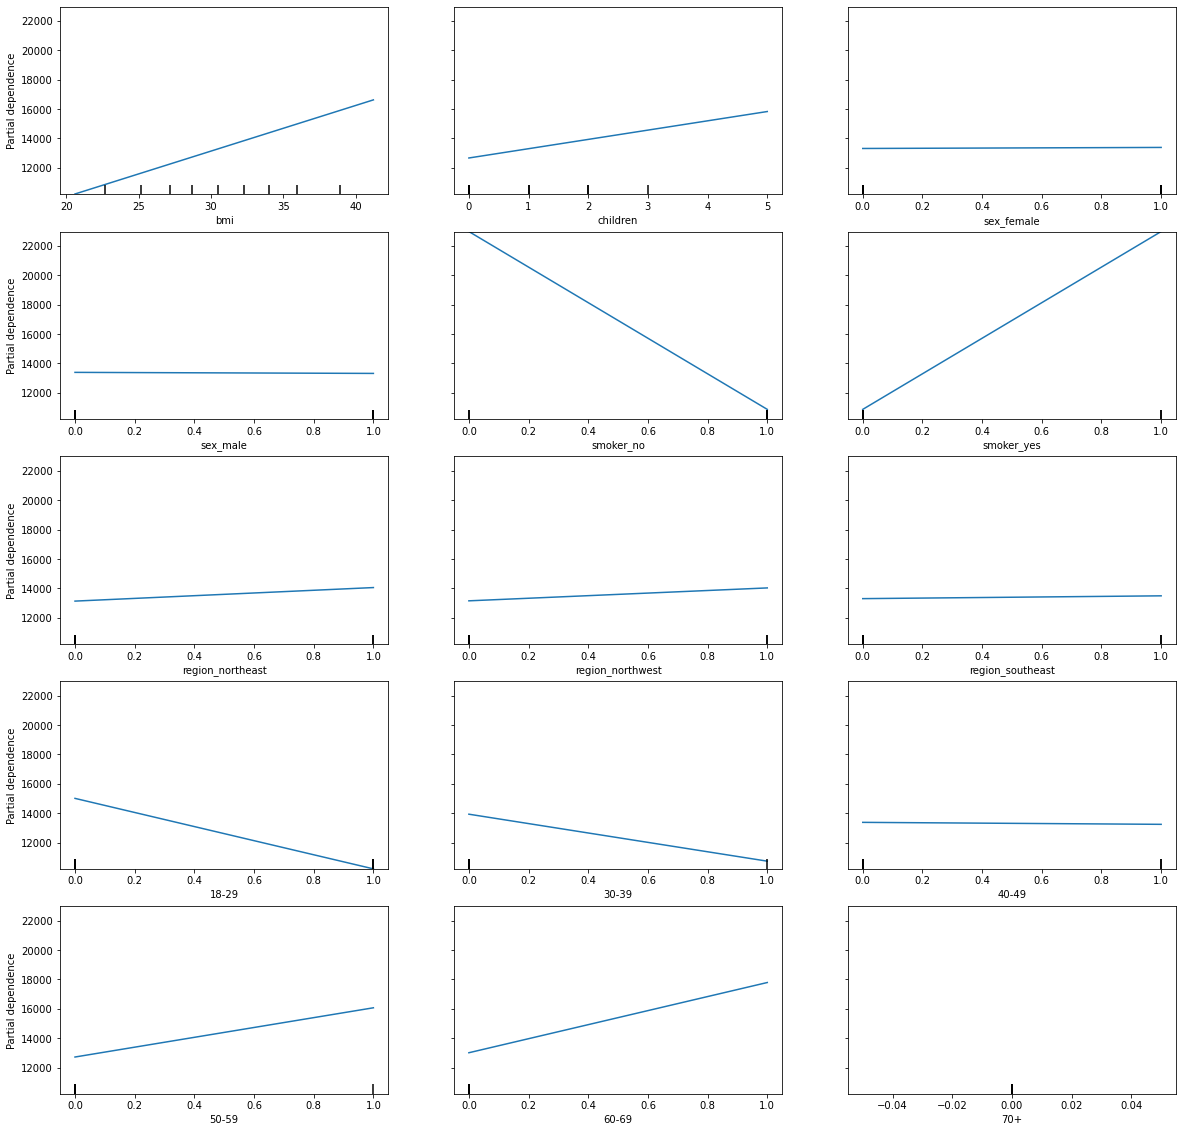

In [350]:
PartialDependenceDisplay.from_estimator(rl, X_train, X_train.columns)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.savefig('rl-cenario1.png', format='png')

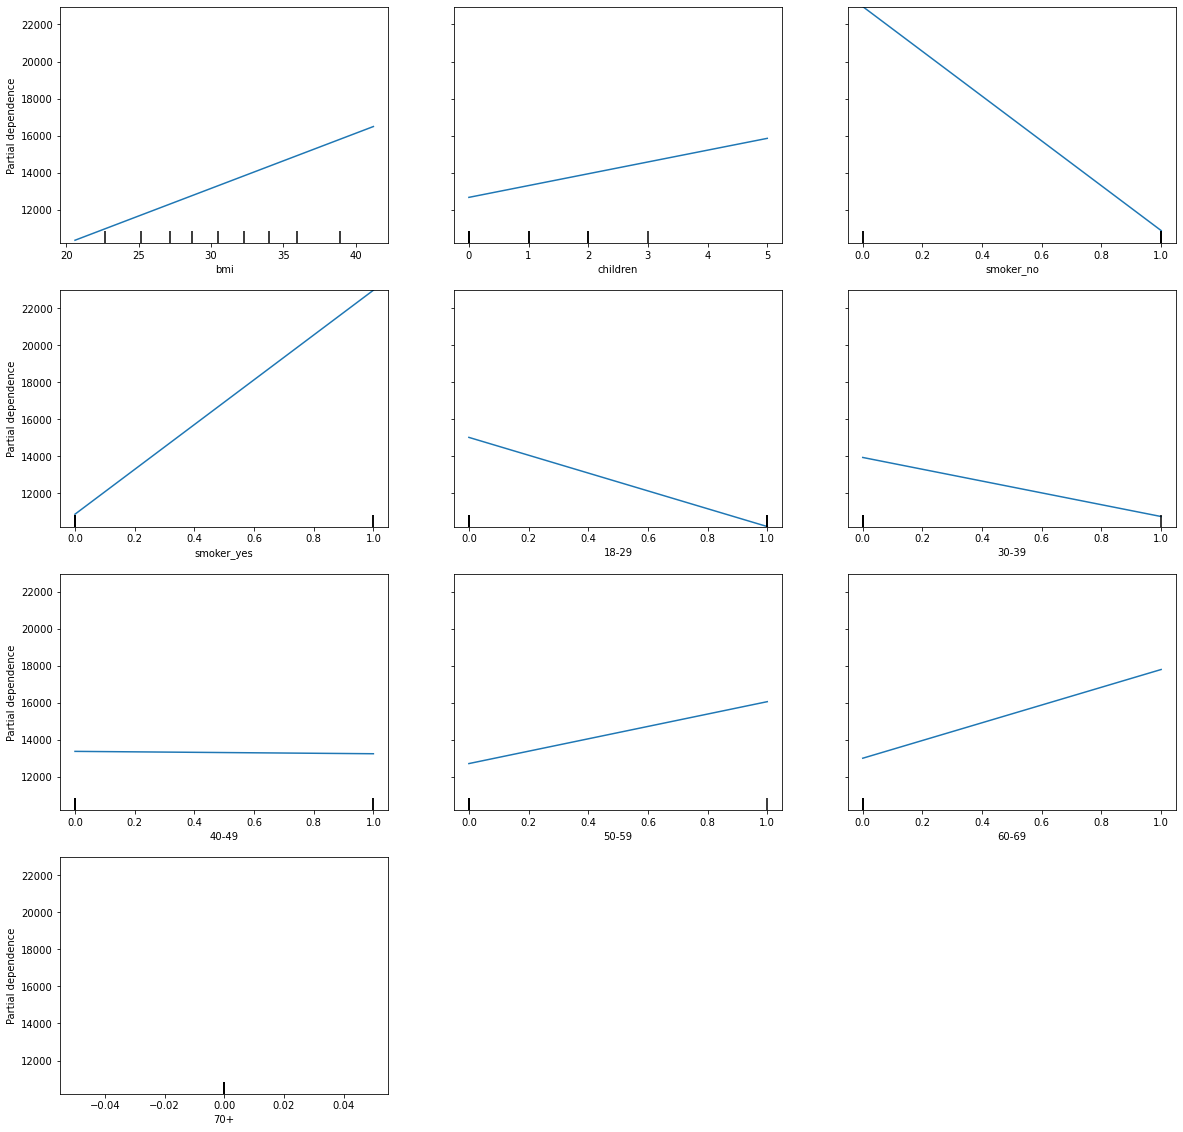

In [349]:
PartialDependenceDisplay.from_estimator(rl_2, X_train_2, X_train_2.columns)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.savefig('rl-cenario2.png', format='png')

## Decision Tree

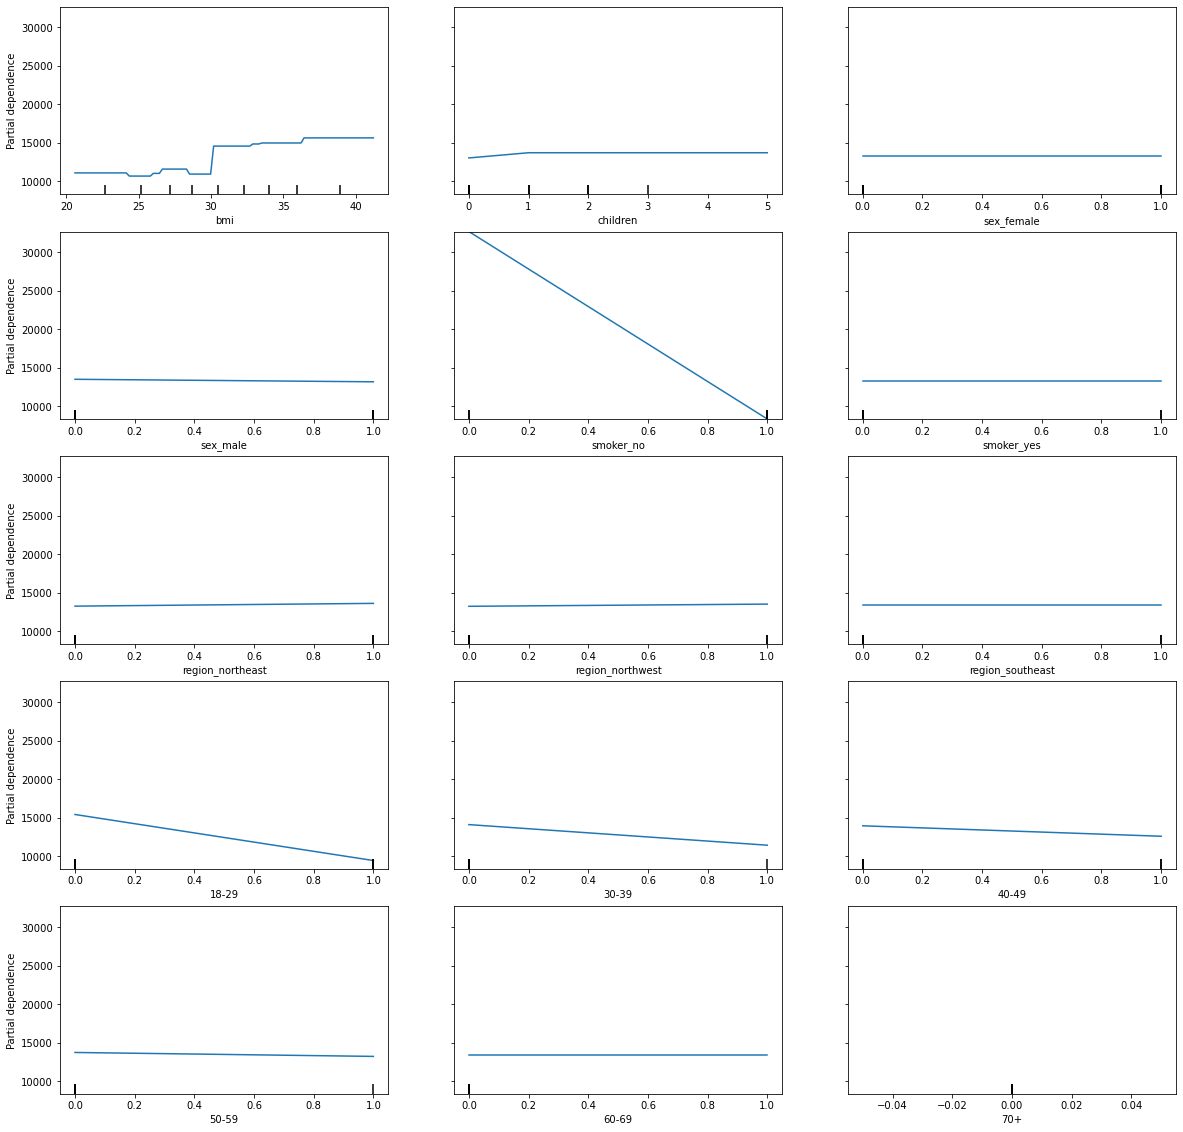

In [348]:
PartialDependenceDisplay.from_estimator(best_dt_model, X_train, X_train.columns)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.savefig('dt-cenario1.png', format='png')

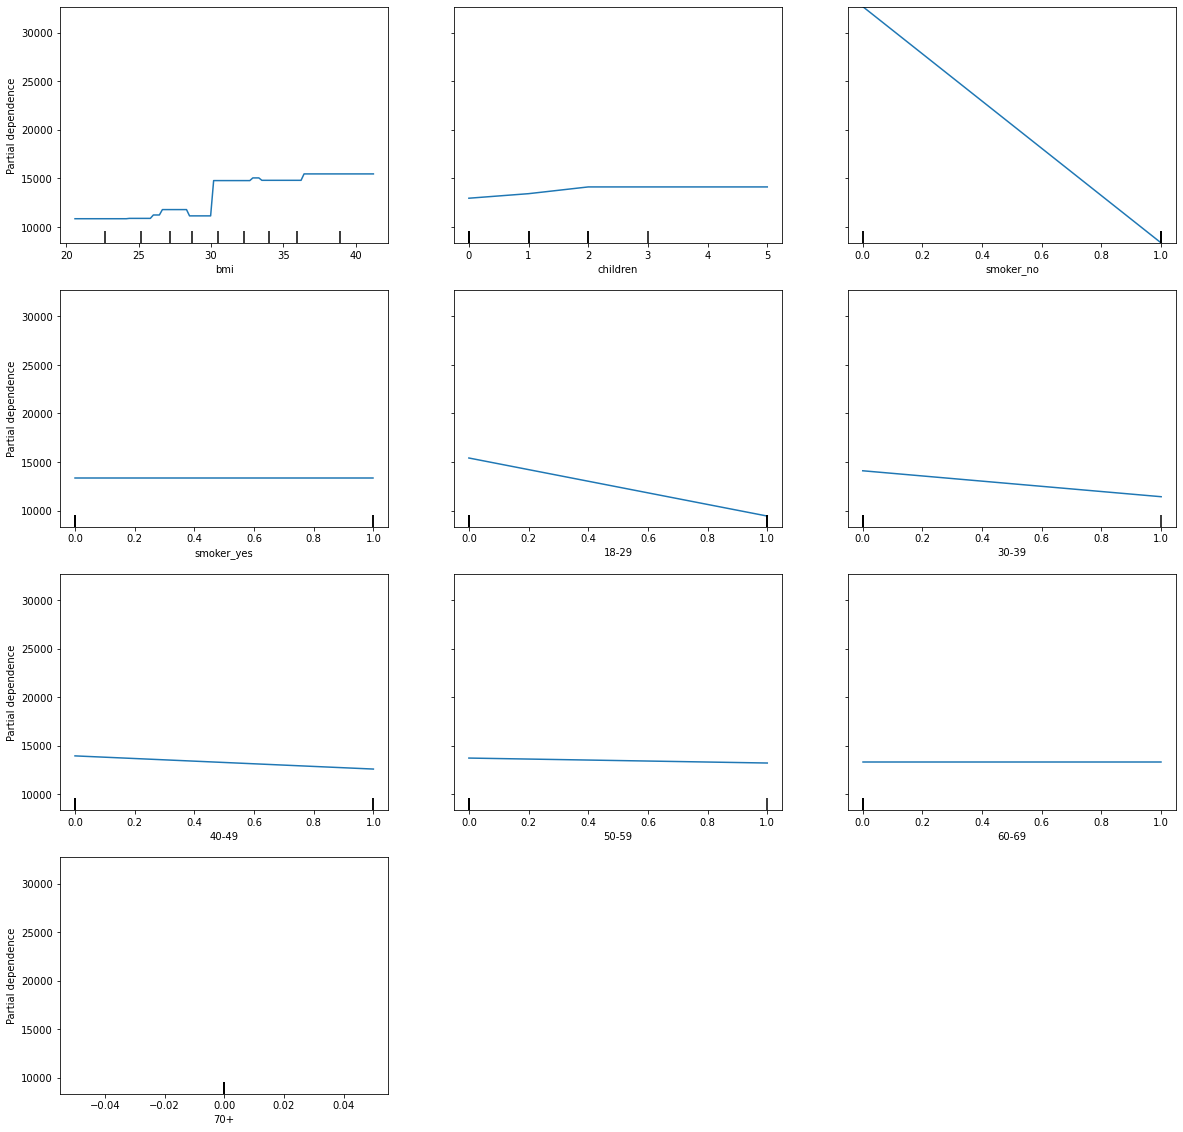

In [347]:
PartialDependenceDisplay.from_estimator(best_dt_model_2, X_train_2, X_train_2.columns)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.savefig('dt-cenario2.png', format='png')

## Gradient Boosting

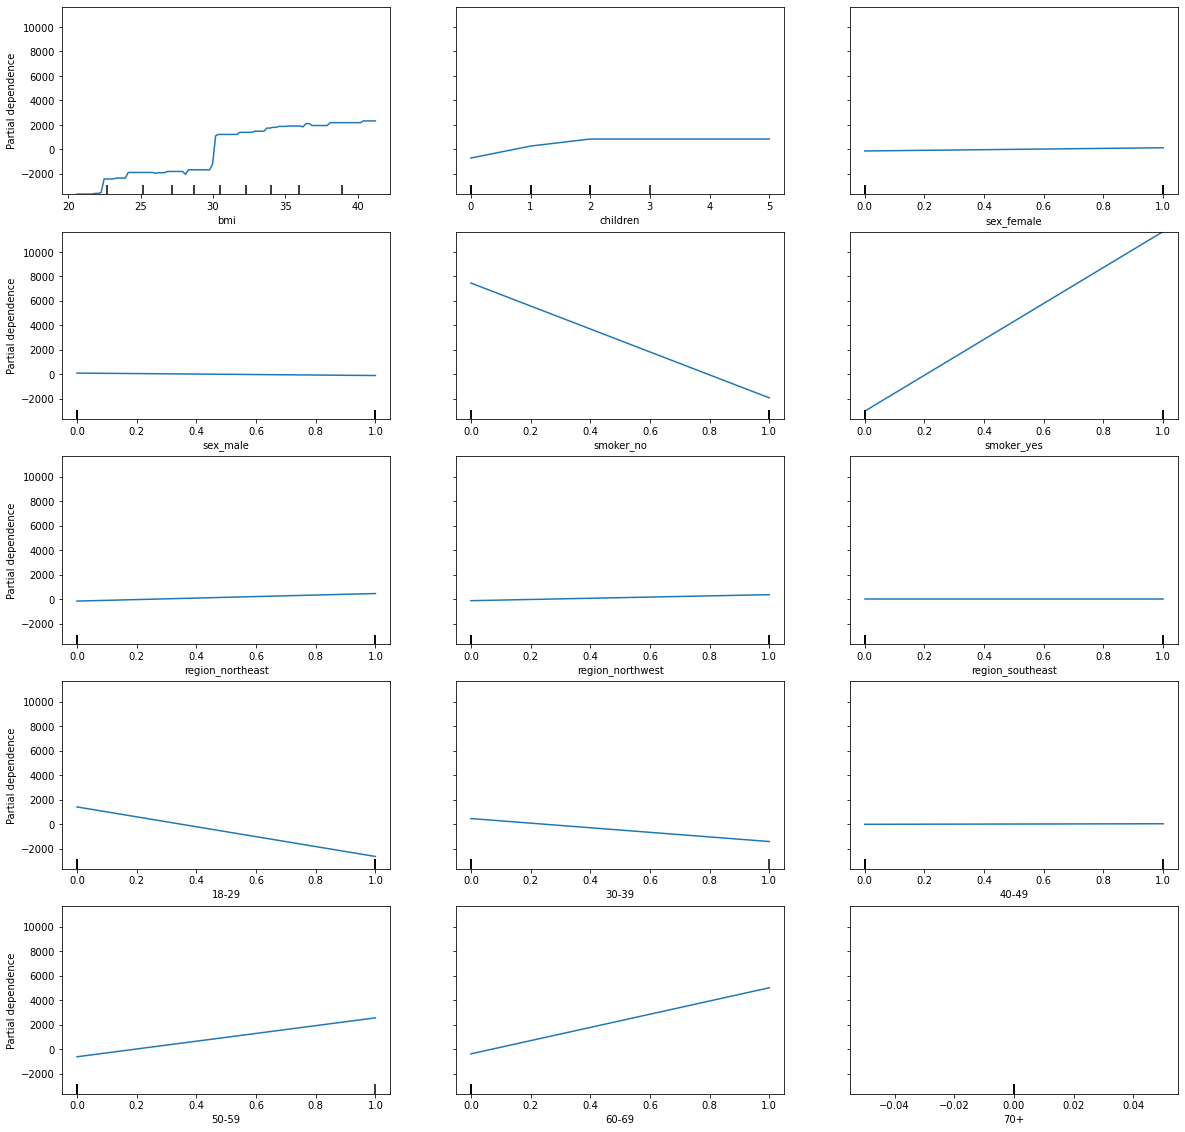

In [345]:
PartialDependenceDisplay.from_estimator(best_gb_model, X_train, X_train.columns)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.savefig('gb-cenario1.png', format='png')

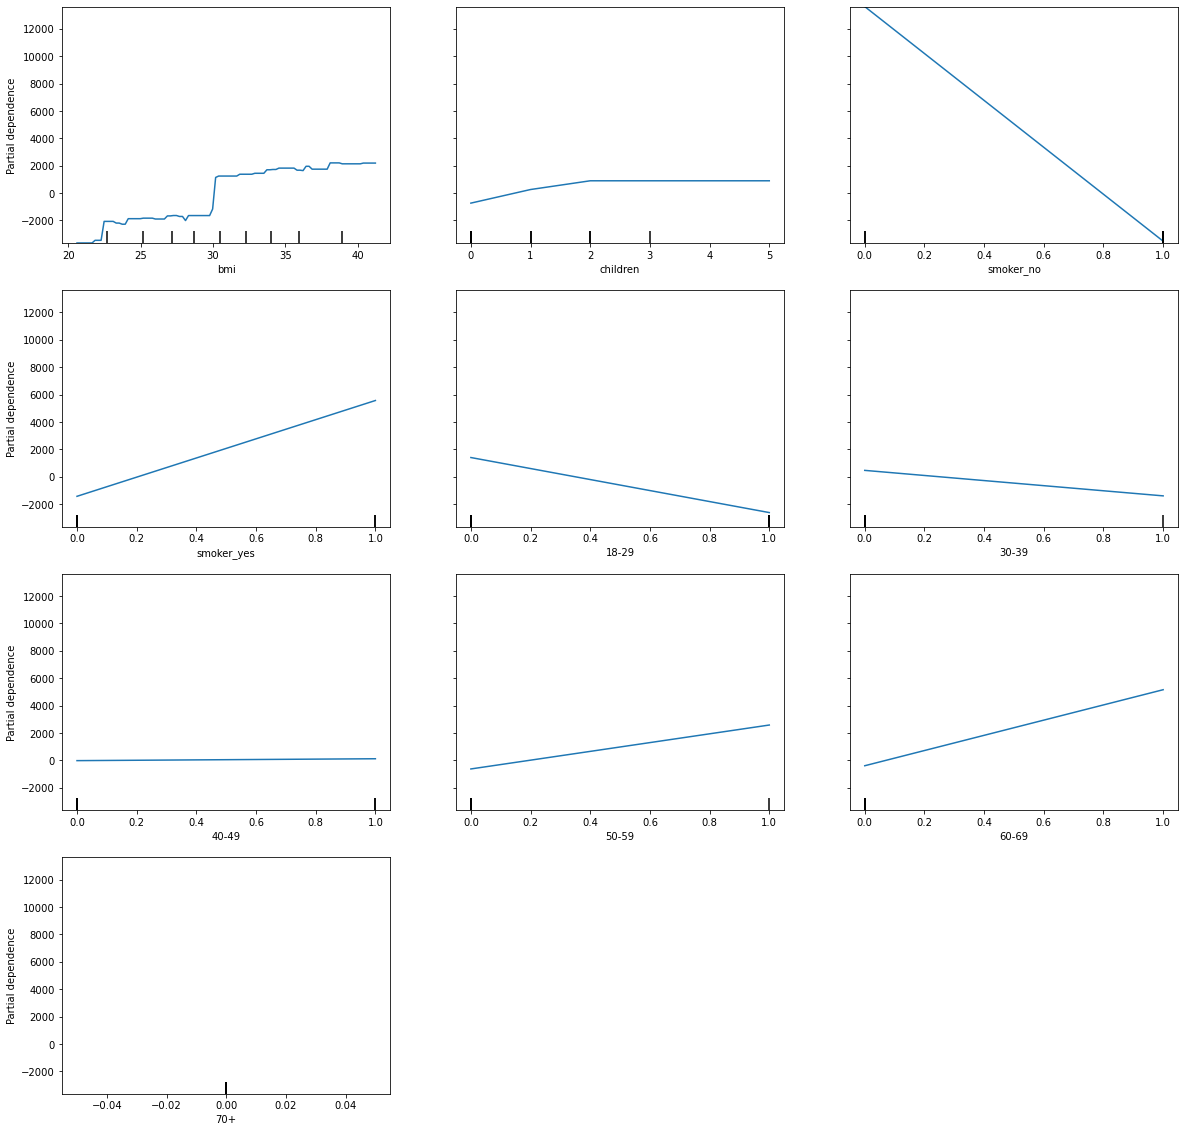

In [346]:
PartialDependenceDisplay.from_estimator(best_gb_model_2, X_train_2, X_train_2.columns)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.savefig('gb-cenario2.png', format='png')

## RuleFit

In [300]:
from pdpbox import pdp

https://pdpbox.readthedocs.io/en/latest/index.html

https://www.kaggle.com/code/dansbecker/partial-plots/tutorial

https://towardsdatascience.com/explainable-ai-xai-methods-part-1-partial-dependence-plot-pdp-349441901a3d

In [94]:
X_train.columns

Index(['bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast', '18-29',
       '30-39', '40-49', '50-59', '60-69', '70+'],
      dtype='object')

In [103]:
feature_names = [i for i in df.columns if df[i].dtype in [np.int64]]
feature_names

['age', 'children']

In [100]:
features_plot = ['bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes','region_northeast', 'region_northwest', 'region_southeast']


In [423]:
# inter1 = pdp.pdp_interact(model=best_rf_model, dataset=X_train, model_features=X_train.columns, features='smoker_yes')

# pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=feature_names, plot_type='contour')


pdp_goals = pdp.pdp_isolate(model=best_rf_model, dataset=X_train, model_features=X_train.columns, feature='smoker_yes')
# plot
pdp.pdp_plot(pdp_goals, 'Age (40-49)')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show( )

InvalidIndexError: (slice(None, None, None), 0)

In [109]:
X_test.columns.values

array(['bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', '18-29', '30-39', '40-49', '50-59', '60-69',
       '70+'], dtype=object)

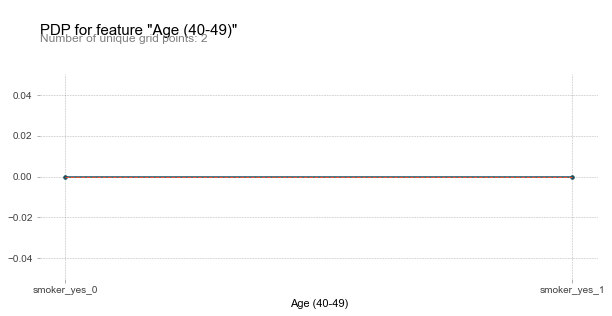

In [352]:
# PartialDependenceDisplay.from_estimator(best_rf_model, X_train, X_train.columns)



pdp_goals = pdp.pdp_isolate(model=best_dt_model, dataset=X_train, model_features=X_train.columns.values, feature='smoker_yes')
# plot
pdp.pdp_plot(pdp_goals, 'Age (40-49)')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show( )

## Shap

In [445]:
d = {'age': [65, 38, 23], 'sex': ['male','female','male'], 'bmi':[50.5, 30.3, 29.5],'children':[0,5,2],
     'smoker':['yes','yes','no'],'region':['northeast','southeast','southwest']}
df_exemplos = pd.DataFrame(d)
df_exemplos.head()

,age,sex,bmi,children,smoker,region
0,65,male,50.5,0,yes,northeast
1,38,female,30.3,5,yes,southeast
2,23,male,29.5,2,no,southwest


In [446]:
dummies = pd.get_dummies(df_exemplos[['sex','smoker','region']])
df_exemplos = pd.concat([df_exemplos, dummies], axis=1)

In [447]:
df_exemplos

,age,sex,bmi,children,smoker,region,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_southeast,region_southwest
0,65,male,50.5,0,yes,northeast,0,1,0,1,1,0,0
1,38,female,30.3,5,yes,southeast,1,0,0,1,0,1,0
2,23,male,29.5,2,no,southwest,0,1,1,0,0,0,1


In [448]:
ages = pd.DataFrame(df_exemplos['age'])

bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
ages['agerange'] = pd.cut(ages.age, bins, labels = labels,include_lowest = True)
df_exemplos = pd.concat([df_exemplos, ages], axis=1)
df_exemplos

,age,sex,bmi,children,smoker,region,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_southeast,region_southwest,age,agerange
0,65,male,50.5,0,yes,northeast,0,1,0,1,1,0,0,65,60-69
1,38,female,30.3,5,yes,southeast,1,0,0,1,0,1,0,38,30-39
2,23,male,29.5,2,no,southwest,0,1,1,0,0,0,1,23,18-29


In [449]:
dummies_age = pd.get_dummies(df_exemplos['agerange'])
df_exemplos = pd.concat([df_exemplos, dummies_age], axis=1)
df_exemplos.head()

,age,sex,bmi,children,smoker,region,sex_female,sex_male,smoker_no,smoker_yes,...,region_southeast,region_southwest,age,agerange,18-29,30-39,40-49,50-59,60-69,70+
0,65,male,50.5,0,yes,northeast,0,1,0,1,...,0,0,65,60-69,0,0,0,0,1,0
1,38,female,30.3,5,yes,southeast,1,0,0,1,...,1,0,38,30-39,0,1,0,0,0,0
2,23,male,29.5,2,no,southwest,0,1,1,0,...,0,1,23,18-29,1,0,0,0,0,0


In [87]:
df_exemplos['region_northwest'] = 0

In [88]:
df_exemplos.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'sex_female',
       'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast',
       'region_southeast', 'region_southwest', 'age', 'agerange', '18-29',
       '30-39', '40-49', '50-59', '60-69', '70+', 'region_northwest'],
      dtype='object')

In [89]:
X_train.columns

Index(['bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast', '18-29',
       '30-39', '40-49', '50-59', '60-69', '70+'],
      dtype='object')

In [450]:
df_exemplos_1 = df_exemplos[['bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast', '18-29',
       '30-39', '40-49', '50-59', '60-69', '70+']]

df_exemplos_2 = df_exemplos[['bmi', 'children', 'smoker_no', 'smoker_yes', '18-29', '30-39', '40-49',
       '50-59', '60-69', '70+']]

KeyError: "['region_northwest'] not in index"

## Explicação primeiro exemplo do 2 - GB

In [99]:
df_exemplos_2.iloc[0, :]

bmi           50.5
children       0.0
smoker_no      0.0
smoker_yes     1.0
18-29          0.0
30-39          0.0
40-49          0.0
50-59          0.0
60-69          1.0
70+            0.0
Name: 0, dtype: float64

In [451]:
explainer_2 = shap.TreeExplainer(best_gb_model_2)
shap_values_2 = explainer_2.shap_values(df_exemplos_2)
shap.force_plot(explainer_2.expected_value, shap_values_2[0, :], df_exemplos_2.iloc[0, :])


In [98]:
explainer.expected_value

array([13351.44223751])

Red color indicates features that are pushing the prediction higher, and blue color indicates just the opposite.

In [452]:
explainer = shap.TreeExplainer(best_gb_model_2)
shap_values = explainer.shap_values(df_exemplos_2)

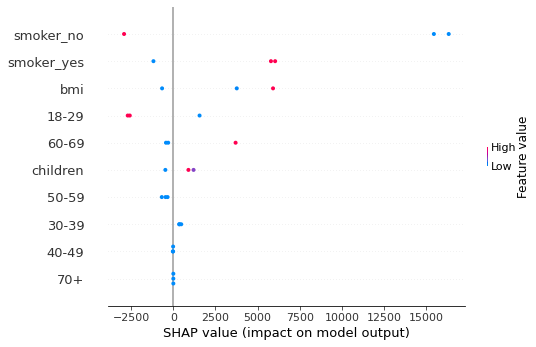

In [94]:
shap.summary_plot(shap_values, df_exemplos_2)


In [104]:
# explainer = shap.TreeExplainer(best_gb_model)
# shap_values = explainer.shap_values(X_train)

explainer_1 = shap.TreeExplainer(best_gb_model)
shap_values_1 = explainer_1.shap_values(df_exemplos_1)
shap.force_plot(explainer_1.expected_value, shap_values_1[0, :], df_exemplos_1.iloc[0, :])

In [102]:
print(explainer.expected_value)

[13351.44223751]


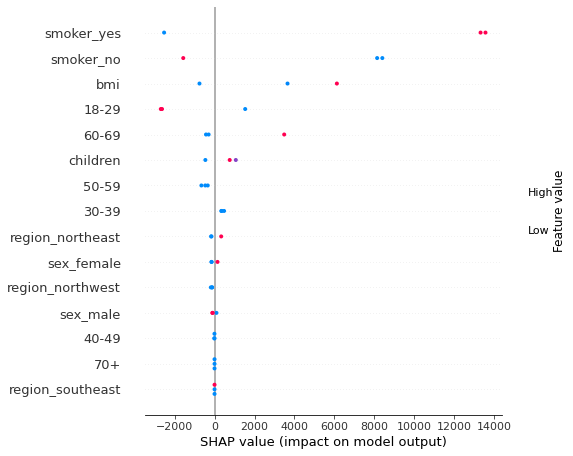

In [103]:
shap.summary_plot(shap_values, df_exemplos_1)

In [453]:

shap.force_plot(explainer_1.expected_value, shap_values_1[1, :], df_exemplos_1.iloc[1, :])

In [454]:
shap.force_plot(explainer_2.expected_value, shap_values_2[1, :], df_exemplos_2.iloc[1, :])

In [107]:
shap.force_plot(explainer_1.expected_value, shap_values_1[2, :], df_exemplos_1.iloc[2, :])

In [110]:
shap.force_plot(explainer_2.expected_value, shap_values_2[2, :], df_exemplos_2.iloc[2, :])

### Decision Tree

In [455]:
explainer_1_dt = shap.TreeExplainer(best_dt_model)
shap_values_1_dt = explainer_1_dt.shap_values(df_exemplos_1)
shap.force_plot(explainer_1_dt.expected_value, shap_values_1_dt[0, :], df_exemplos_1.iloc[0, :])

In [456]:
explainer_2_dt = shap.TreeExplainer(best_dt_model_2)
shap_values_2_dt = explainer_2_dt.shap_values(df_exemplos_2)
shap.force_plot(explainer_2_dt.expected_value, shap_values_2_dt[0, :], df_exemplos_2.iloc[0, :])

In [457]:
shap.force_plot(explainer_1_dt.expected_value, shap_values_1_dt[1, :], df_exemplos_1.iloc[1, :])

In [458]:
shap.force_plot(explainer_2_dt.expected_value, shap_values_2_dt[1, :], df_exemplos_2.iloc[1, :])

In [117]:
shap.force_plot(explainer_1_dt.expected_value, shap_values_1_dt[2, :], df_exemplos_1.iloc[2, :])

In [116]:
shap.force_plot(explainer_2_dt.expected_value, shap_values_2_dt[2, :], df_exemplos_2.iloc[2, :])

### Regressão Linear

In [118]:
explainer_rl_1 = shap.LinearExplainer(rl, df_exemplos_1)
shap_values_rl_1= explainer_rl_1.shap_values(df_exemplos_1)
shap.force_plot(explainer_rl_1.expected_value, shap_values_rl_1[0, :], df_exemplos_1.iloc[0, :])

In [119]:
explainer_rl_2 = shap.LinearExplainer(rl_2, df_exemplos_2)
shap_values_rl_2= explainer_rl_2.shap_values(df_exemplos_2)
shap.force_plot(explainer_rl_2.expected_value, shap_values_rl_2[0, :], df_exemplos_2.iloc[0, :])

In [121]:
shap.force_plot(explainer_rl_1.expected_value, shap_values_rl_1[1, :], df_exemplos_1.iloc[1, :])

In [120]:
shap.force_plot(explainer_rl_2.expected_value, shap_values_rl_2[1, :], df_exemplos_2.iloc[1, :])

In [123]:
shap.force_plot(explainer_rl_1.expected_value, shap_values_rl_1[2, :], df_exemplos_1.iloc[2, :])

In [122]:
shap.force_plot(explainer_rl_2.expected_value, shap_values_rl_2[2, :], df_exemplos_2.iloc[2, :])

### RuleFit

In [144]:
explainer = shap.LinearExplainer(best_rf_model_2, X_train_2)


ValueError: shapes (105,) and (10,) not aligned: 105 (dim 0) != 10 (dim 0)

In [133]:
explainer_rf = shap.Explainer(best_rf_model_2)
shap_values_rf = explainer_rf.shap_values(X_train_2)

shap.summary_plot(shap_values_rf, X_train_2)


Exception: The passed model is not callable and cannot be analyzed directly with the given masker! Model: RuleFit(exp_rand_tree_size=False, lin_trim_quantile=0.05, max_iter=1000,
        max_rules=200, random_state=591,
        tree_generator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=100,
                                                 max_leaf_nodes=5,
                                                 n_estimators=40,
                                                 random_state=591,
                                                 subsample=0.3029537419757909),
        tree_size=5)

## ALE

In [360]:
from alepython import ale_plot
#Atualmente ele não plota com variáveis categóricas

In [361]:
from alibi.explainers import ALE, plot_ale

https://docs.seldon.io/projects/alibi/en/latest/methods/ALE.html

https://github.com/blent-ai/ALEPython (IMPORTANTE, OLHAR O FINAL)


https://towardsdatascience.com/explainable-ai-xai-methods-part-3-accumulated-local-effects-ale-cf6ba3387fde

In [355]:
def ale_plot_models(model,X,index_column):
    ale_plot(model, X, X.columns[index_column], monte_carlo=True)
    fig = plt.gcf()
    fig.set_size_inches(20, 20)

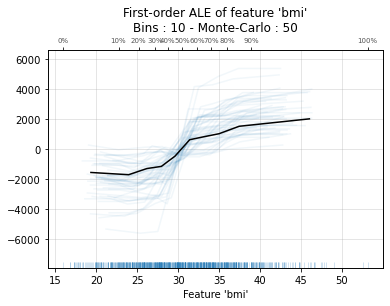

<Figure size 1440x1440 with 0 Axes>

In [197]:
ale_plot_models(best_dt_model,X_train,0)

Exemplo: The ALE value of around -660 for the month of December would mean that for the month of December, the predicted number of bikes rented would be lower by 660 than the average prediction.

### Regressão Linear

In [389]:
lr_ale = ALE(rl.predict, feature_names=X_train.columns, target_names=['charges'])
dt_ale = ALE(best_dt_model.predict, feature_names=X_train.columns, target_names=['charges'])
gb_ale = ALE(best_gb_model.predict, feature_names=X_train.columns, target_names=['charges'])
rf_ale = ALE(best_rf_model.predict, feature_names=X_train.columns, target_names=['charges'])


In [390]:
lr_ale_2 = ALE(rl_2.predict, feature_names=X_train_2.columns, target_names=['charges'])
dt_ale_2 = ALE(best_dt_model_2.predict, feature_names=X_train_2.columns, target_names=['charges'])
gb_ale_2 = ALE(best_gb_model_2.predict, feature_names=X_train_2.columns, target_names=['charges'])
rf_ale_2 = ALE(best_rf_model_2.predict, feature_names=X_train_2.columns, target_names=['charges'])


In [395]:
lr_exp = lr_ale.explain(X_train.values)
dt_exp = dt_ale.explain(X_train.values)
rf_exp = gb_ale.explain(X_train.values)
gb_exp = rf_ale.explain(X_train.values)

lr_exp_2 = lr_ale_2.explain(X_train_2.values)
dt_exp_2 = dt_ale_2.explain(X_train_2.values)
gb_exp_2 = gb_ale_2.explain(X_train_2.values)
rf_exp_2 = rf_ale_2.explain(X_train_2.values)


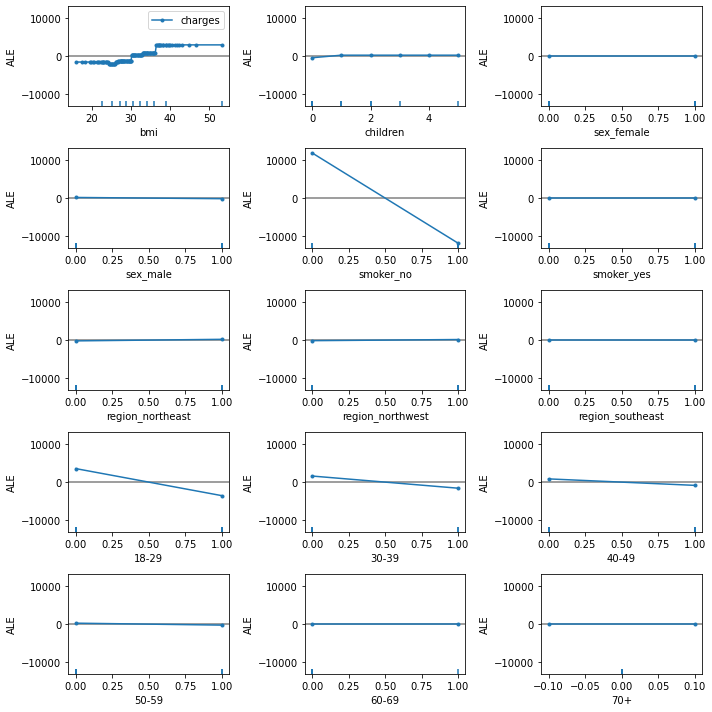

In [388]:
plot_ale(dt_exp, fig_kw={'figwidth':10, 'figheight': 10});


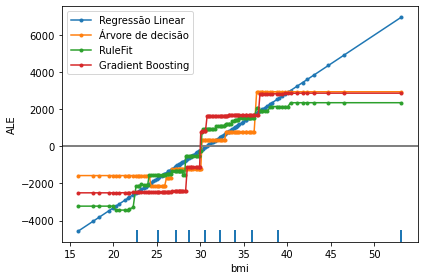

In [397]:
fig, ax = plt.subplots()
plot_ale(lr_exp, features=['bmi'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp, features=['bmi'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp, features=['bmi'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp, features=['bmi'], ax=ax, line_kw={'label': 'Gradient Boosting'});

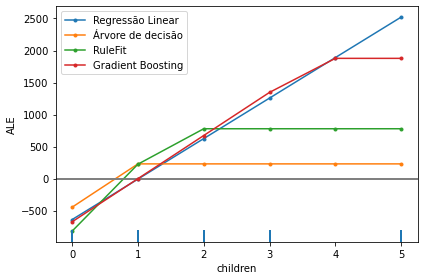

In [408]:
fig, ax = plt.subplots()
plot_ale(lr_exp, features=['children'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp, features=['children'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp, features=['children'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp, features=['children'], ax=ax, line_kw={'label': 'Gradient Boosting'});

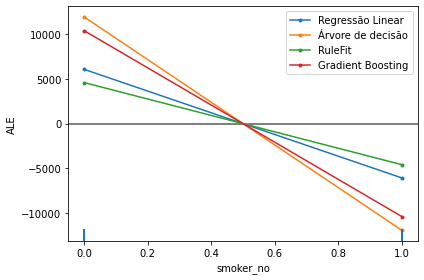

In [399]:
fig, ax = plt.subplots()
plot_ale(lr_exp, features=['smoker_no'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp, features=['smoker_no'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp, features=['smoker_no'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp, features=['smoker_no'], ax=ax, line_kw={'label': 'Gradient Boosting'});

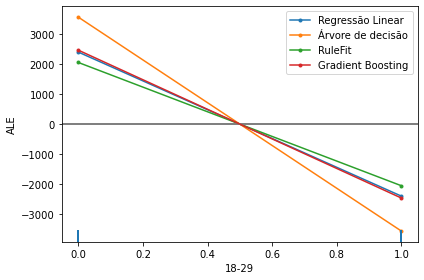

In [400]:
fig, ax = plt.subplots()
plot_ale(lr_exp, features=['18-29'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp, features=['18-29'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp, features=['18-29'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp, features=['18-29'], ax=ax, line_kw={'label': 'Gradient Boosting'});

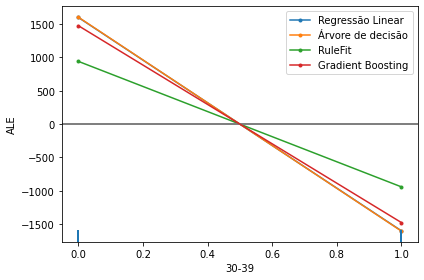

In [402]:
fig, ax = plt.subplots()
plot_ale(lr_exp, features=['30-39'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp, features=['30-39'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp, features=['30-39'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp, features=['30-39'], ax=ax, line_kw={'label': 'Gradient Boosting'});

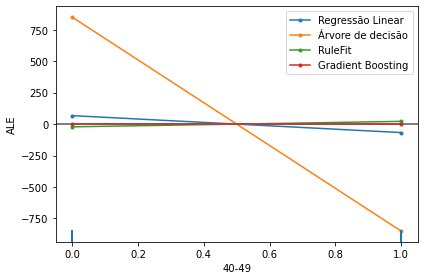

In [403]:
fig, ax = plt.subplots()
plot_ale(lr_exp, features=['40-49'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp, features=['40-49'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp, features=['40-49'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp, features=['40-49'], ax=ax, line_kw={'label': 'Gradient Boosting'});

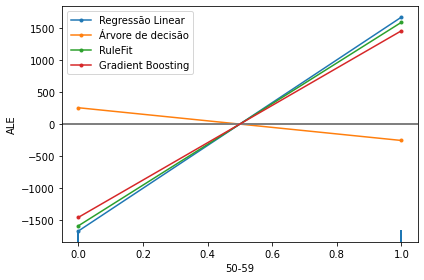

In [404]:
fig, ax = plt.subplots()
plot_ale(lr_exp, features=['50-59'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp, features=['50-59'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp, features=['50-59'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp, features=['50-59'], ax=ax, line_kw={'label': 'Gradient Boosting'});

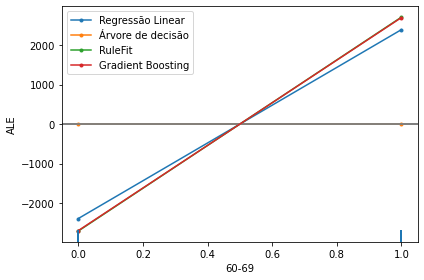

In [405]:
fig, ax = plt.subplots()
plot_ale(lr_exp, features=['60-69'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp, features=['60-69'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp, features=['60-69'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp, features=['60-69'], ax=ax, line_kw={'label': 'Gradient Boosting'});

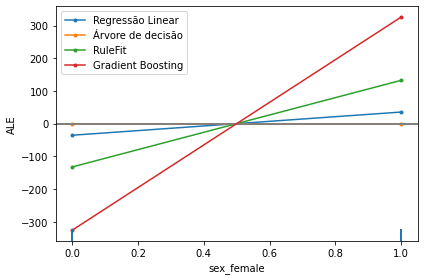

In [401]:
fig, ax = plt.subplots()
plot_ale(lr_exp, features=['sex_female'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp, features=['sex_female'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp, features=['sex_female'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp, features=['sex_female'], ax=ax, line_kw={'label': 'Gradient Boosting'});

### Cenário 2

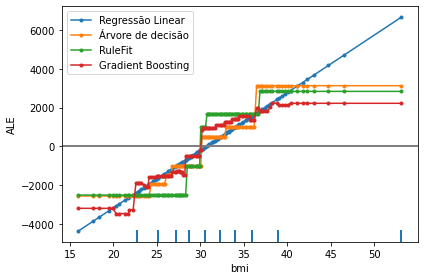

In [406]:
fig, ax = plt.subplots()
plot_ale(lr_exp_2, features=['bmi'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp_2, features=['bmi'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp_2, features=['bmi'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp_2, features=['bmi'], ax=ax, line_kw={'label': 'Gradient Boosting'});

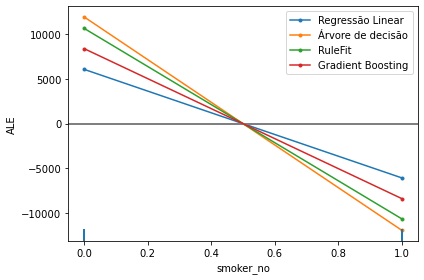

In [407]:
fig, ax = plt.subplots()
plot_ale(lr_exp_2, features=['smoker_no'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp_2, features=['smoker_no'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp_2, features=['smoker_no'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp_2, features=['smoker_no'], ax=ax, line_kw={'label': 'Gradient Boosting'});

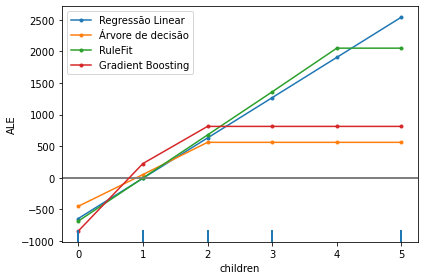

In [409]:
fig, ax = plt.subplots()
plot_ale(lr_exp_2, features=['children'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp_2, features=['children'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp_2, features=['children'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp_2, features=['children'], ax=ax, line_kw={'label': 'Gradient Boosting'});

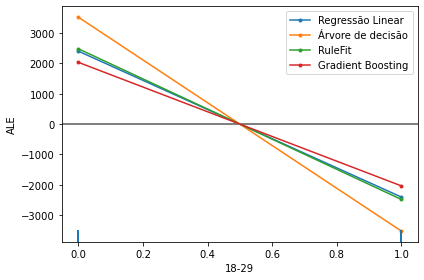

In [410]:
fig, ax = plt.subplots()
plot_ale(lr_exp_2, features=['18-29'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp_2, features=['18-29'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp_2, features=['18-29'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp_2, features=['18-29'], ax=ax, line_kw={'label': 'Gradient Boosting'});

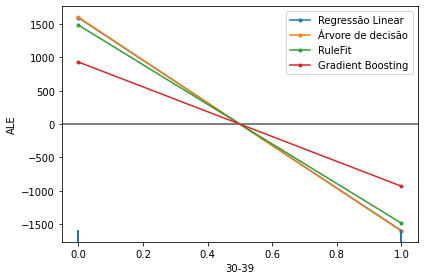

In [411]:

fig, ax = plt.subplots()
plot_ale(lr_exp_2, features=['30-39'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp_2, features=['30-39'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp_2, features=['30-39'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp_2, features=['30-39'], ax=ax, line_kw={'label': 'Gradient Boosting'});

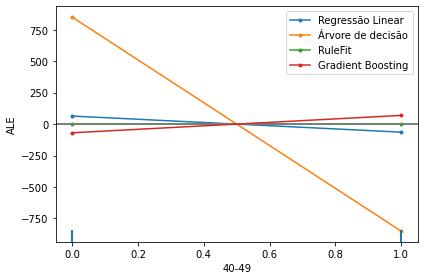

In [412]:

fig, ax = plt.subplots()
plot_ale(lr_exp_2, features=['40-49'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp_2, features=['40-49'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp_2, features=['40-49'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp_2, features=['40-49'], ax=ax, line_kw={'label': 'Gradient Boosting'});

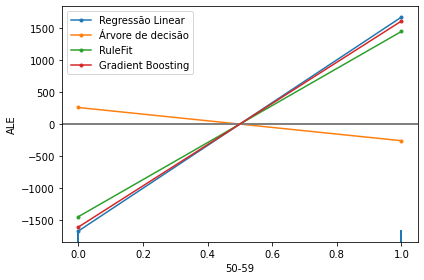

In [413]:

fig, ax = plt.subplots()
plot_ale(lr_exp_2, features=['50-59'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp_2, features=['50-59'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp_2, features=['50-59'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp_2, features=['50-59'], ax=ax, line_kw={'label': 'Gradient Boosting'});

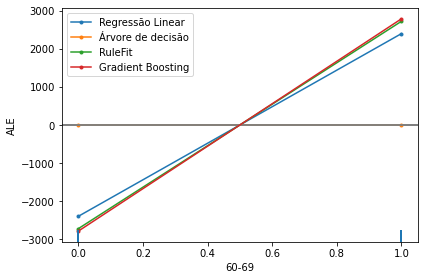

In [414]:

fig, ax = plt.subplots()
plot_ale(lr_exp_2, features=['60-69'], ax=ax, line_kw={'label': 'Regressão Linear'});
plot_ale(dt_exp_2, features=['60-69'], ax=ax, line_kw={'label': 'Árvore de decisão'});
plot_ale(rf_exp_2, features=['60-69'], ax=ax, line_kw={'label': 'RuleFit'});
plot_ale(gb_exp_2, features=['60-69'], ax=ax, line_kw={'label': 'Gradient Boosting'});

## ICE

https://medium.com/nlplanet/two-minutes-nlp-partial-dependence-and-ice-plots-d14806e3c1e4

In [125]:
def ice_plot_models(column,model,X):
    shap.plots.partial_dependence(
    column, model.predict, X, ice=True,
    model_expected_value=True, feature_expected_value=True)

### Regressão Linear

In [132]:
df_exemplos_1[:1]

,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+
0,50.5,0,0,1,0,1,1,0,0,0,0,0,0,1,0


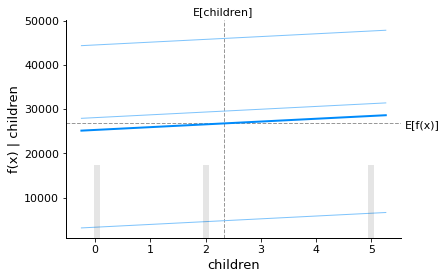

In [134]:
ice_plot_models("children",rl,df_exemplos_1)

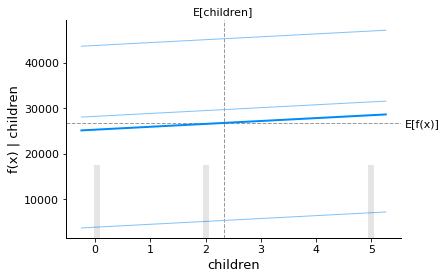

In [135]:
ice_plot_models("children",rl_2,df_exemplos_2)

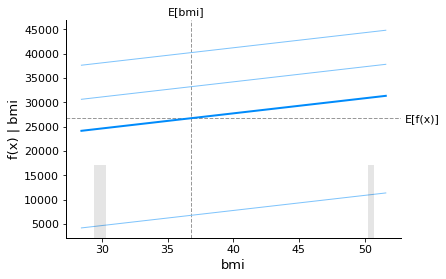

In [136]:
ice_plot_models("bmi",rl,df_exemplos_1)

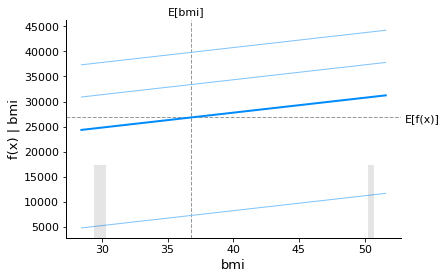

In [137]:
ice_plot_models("bmi",rl_2,df_exemplos_2)

In [139]:
df_exemplos_1.columns

Index(['bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast', '18-29',
       '30-39', '40-49', '50-59', '60-69', '70+'],
      dtype='object')

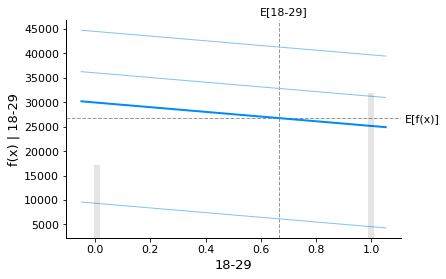

In [140]:
ice_plot_models("18-29",rl,df_exemplos_1)

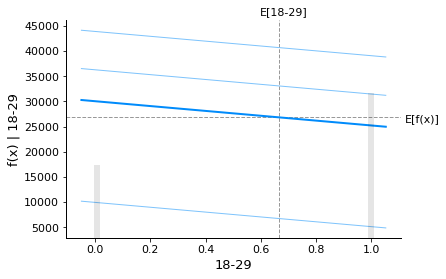

In [149]:
ice_plot_models("18-29",rl_2,df_exemplos_2)

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.


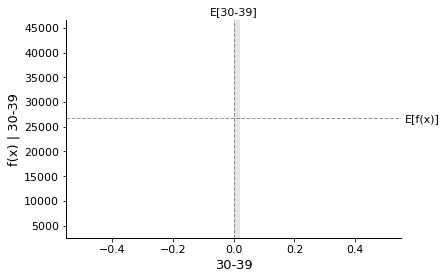

In [141]:
ice_plot_models("30-39",rl,df_exemplos_1)

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.


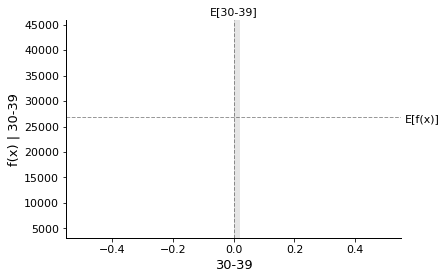

In [148]:
ice_plot_models("30-39",rl_2,df_exemplos_2)

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.


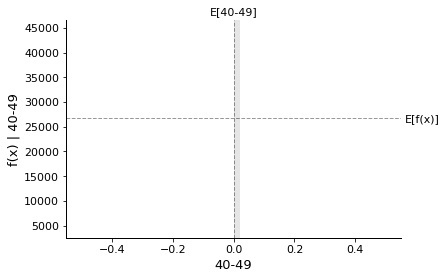

In [142]:
ice_plot_models("40-49",rl,df_exemplos_1)

In [237]:
X_train_2.columns

Index(['bmi', 'children', 'smoker_no', 'smoker_yes', '18-29', '30-39', '40-49',
       '50-59', '60-69', '70+'],
      dtype='object')

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.


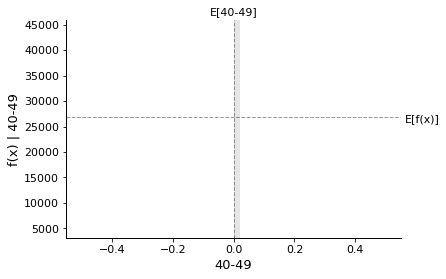

In [147]:
ice_plot_models("40-49",rl_2,df_exemplos_2)

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.


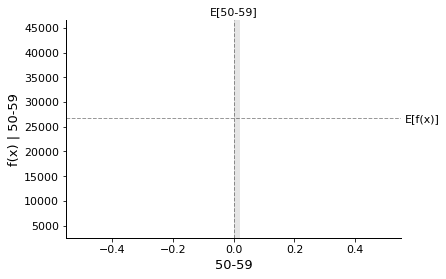

In [143]:
ice_plot_models("50-59",rl,df_exemplos_1)

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.


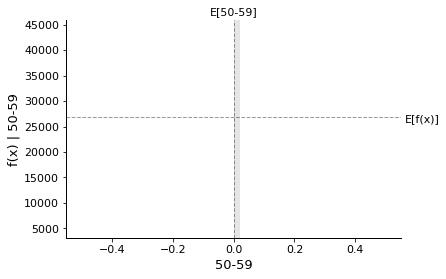

In [146]:
ice_plot_models("50-59",rl_2,df_exemplos_2)

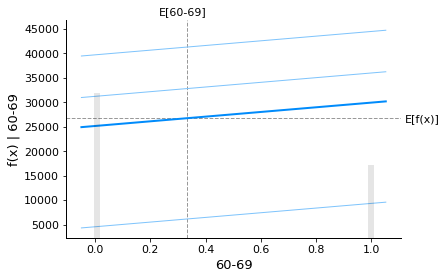

In [144]:
ice_plot_models("60-69",rl,df_exemplos_1)

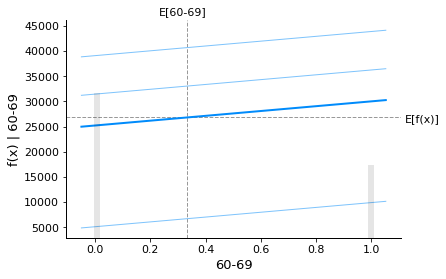

In [145]:
ice_plot_models("60-69",rl_2,df_exemplos_2)

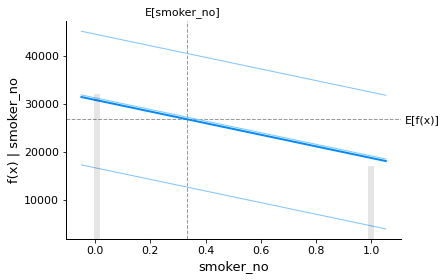

In [151]:
ice_plot_models("smoker_no",rl,df_exemplos_1)

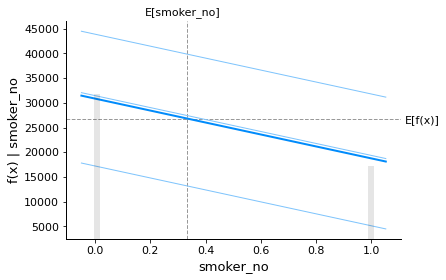

In [150]:
ice_plot_models("smoker_no",rl_2,df_exemplos_2)

### Decision Tree

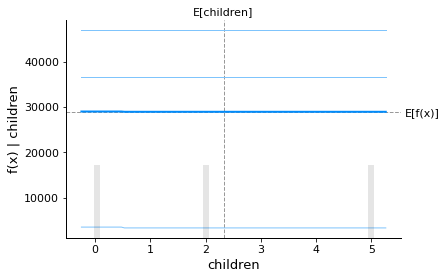

In [155]:
ice_plot_models("children",best_dt_model,df_exemplos_1)

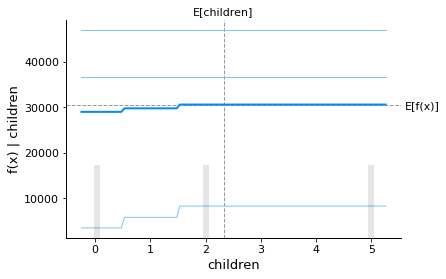

In [152]:
ice_plot_models("children",best_dt_model_2,df_exemplos_2)

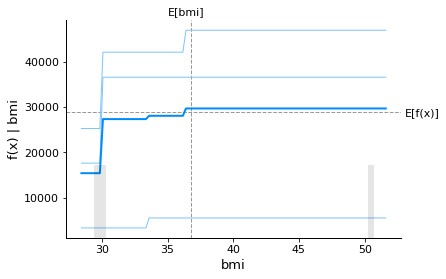

In [156]:
ice_plot_models("bmi",best_dt_model,df_exemplos_1)

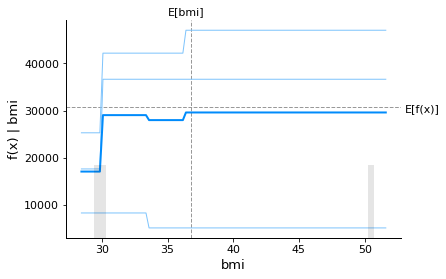

In [153]:

ice_plot_models("bmi",best_dt_model_2,df_exemplos_2)

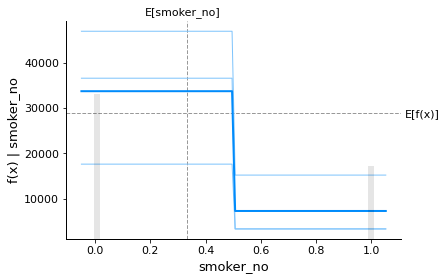

In [157]:
ice_plot_models("smoker_no",best_dt_model,df_exemplos_1)

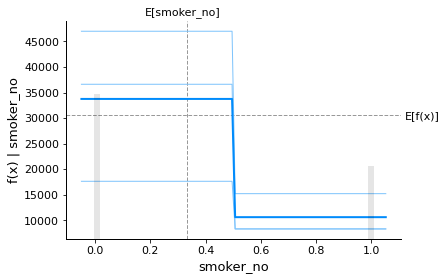

In [154]:
ice_plot_models("smoker_no",best_dt_model_2,df_exemplos_2)

### Gradient Boosting

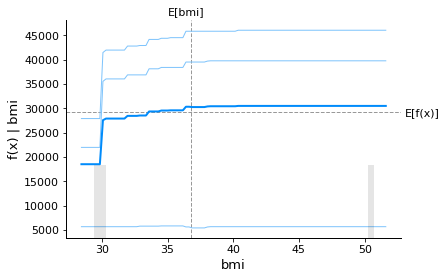

In [158]:
ice_plot_models("bmi",best_gb_model,df_exemplos_1)

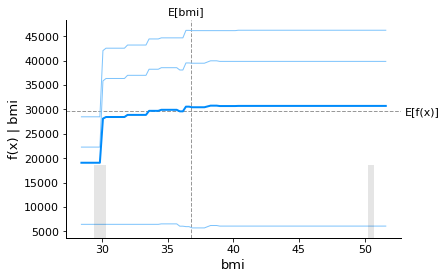

In [169]:
ice_plot_models("bmi",best_gb_model_2,df_exemplos_2)

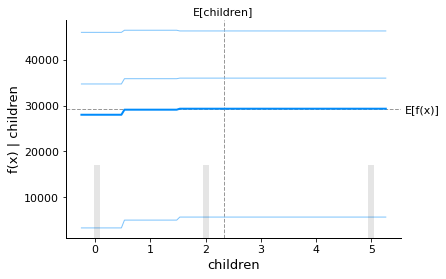

In [159]:
ice_plot_models("children",best_gb_model,df_exemplos_1)

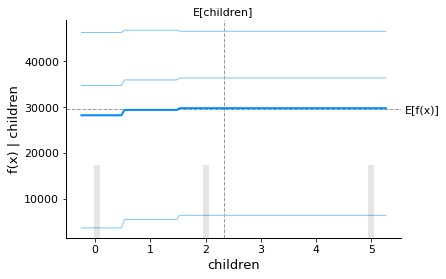

In [168]:
ice_plot_models("children",best_gb_model_2,df_exemplos_2)

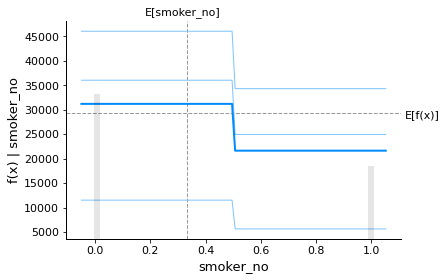

In [160]:
ice_plot_models("smoker_no",best_gb_model,df_exemplos_1)

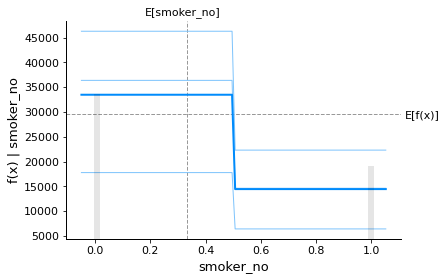

In [170]:
ice_plot_models("smoker_no",best_gb_model_2,df_exemplos_2)

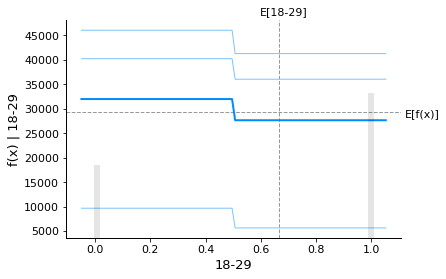

In [161]:
ice_plot_models("18-29",best_gb_model,df_exemplos_1)

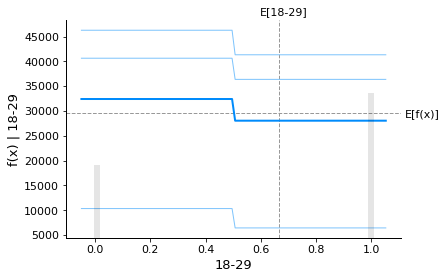

In [162]:
ice_plot_models("18-29",best_gb_model_2,df_exemplos_2)

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.


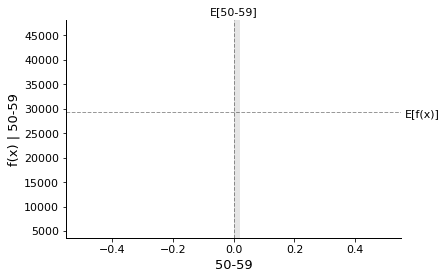

In [163]:
ice_plot_models("50-59",best_gb_model,df_exemplos_1)

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.


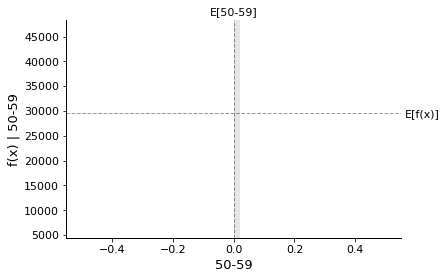

In [167]:
ice_plot_models("50-59",best_gb_model_2,df_exemplos_2)

In [165]:
df_exemplos_1

,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+
0,50.5,0,0,1,0,1,1,0,0,0,0,0,0,1,0
1,30.3,5,1,0,0,1,0,0,1,1,0,0,0,0,0
2,29.5,2,0,1,1,0,0,0,0,1,0,0,0,0,0


### RuleFit

In [171]:
ice_plot_models("bmi",best_rf_model,df_exemplos_1)

InvalidIndexError: (slice(None, None, None), 0)

## Protótipos

In [220]:
from sklearn_extra.cluster import KMedoids

In [ ]:
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)

## Counterfactual Exlanations

In [222]:
# from alibi.explainers import Counterfactual, CounterfactualRL
import dice_ml


In [233]:
df_ex = X_train.copy()
df_ex['charges'] = y_train

In [268]:
df_ex_2 = X_train_2.copy()
df_ex_2['charges'] = y_train_2

In [467]:
d = dice_ml.Data(dataframe=df_ex, continuous_features=['bmi','children'], outcome_name='charges')


In [468]:
d_2 = dice_ml.Data(dataframe=df_ex_2, continuous_features=['bmi','children'], outcome_name='charges')


In [248]:
m = dice_ml.Model(model=rl, backend="sklearn", model_type='regressor')
# Using method=random for generating CFs
exp = dice_ml.Dice(d, m)

In [259]:
query_instances_1 = df_exemplos_1[0:1]
query_instances_2 = df_exemplos_1[1:2]
query_instances_3 = df_exemplos_1[2:3]


In [263]:
query_instances_1_2 = df_exemplos_2[0:1]
query_instances_2_2 = df_exemplos_2[1:2]
query_instances_3_2 = df_exemplos_2[2:3]


In [261]:
query_instances_3

,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+
2,29.5,2,0,1,1,0,0,0,0,1,0,0,0,0,0


## Regressão Linear

In [482]:
m = dice_ml.Model(model=rl, backend="sklearn", model_type='regressor')
# Using method=random for generating CFs
exp = dice_ml.Dice(d, m)

dice_exp = exp.generate_counterfactuals(query_instances_1,total_CFs=4, desired_range=[500, 20000])
dice_exp.visualize_as_dataframe(show_only_changes=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.69it/s]

Query instance (original outcome : 44503)


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,50.5,0,0,1,0,1,1,0,0,0,0,0,0,1,0,44503.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,19.9,-,-,-,-,0,-,-,0,-,1,-,-,-,-,19707.23046875
1,17.9,-,-,-,1,-,-,-,-,1,-,1,-,-,-,17351.81640625
2,32.5,-,-,-,-,0,-,-,-,1,-,-,-,0,-,17239.958984375
3,31.2,-,-,-,1,-,-,-,-,-,1,-,-,0,-,18436.455078125


In [266]:
df_exemplos_2

,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+
0,50.5,0,0,1,0,0,0,0,1,0
1,30.3,5,0,1,1,0,0,0,0,0
2,29.5,2,1,0,1,0,0,0,0,0


In [461]:
m_rl_2 = dice_ml.Model(model=rl_2, backend="sklearn", model_type='regressor')
# Using method=random for generating CFs
exp_rl_2 = dice_ml.Dice(d_2, m_rl_2)

dice_exp_rl_2 = exp_rl_2.generate_counterfactuals(query_instances_1_2,total_CFs=4, desired_range=[500, 20000])
dice_exp_rl_2.visualize_as_dataframe(show_only_changes=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.04it/s]

Query instance (original outcome : 43882)


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,50.5,0,0,1,0,0,0,0,1,0,43882.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,-,-,1,0,-,-,-,-,-,0,19690.96875
1,-,-,1,0,-,-,1,-,-,-,19563.078125
2,21.6,-,1,-,-,1,-,-,-,-,19994.521484375
3,-,-,1,0,-,-,-,-,-,-,19690.96875


In [462]:
dice_exp = exp.generate_counterfactuals(query_instances_2,total_CFs=4, desired_range=[500, 20000])
dice_exp.visualize_as_dataframe(show_only_changes=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.87it/s]

Query instance (original outcome : 31232)


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,30.3,5,1,0,0,1,0,0,1,1,0,0,0,0,0,31232.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,-,-,-,-,1,-,-,-,1,-,-,-,-,-,-,19129.748046875
1,-,-,-,-,1,-,-,-,-,-,1,-,-,-,-,15933.1123046875
2,-,-,-,-,-,0,-,-,-,-,-,1,-,-,-,18995.080078125
3,-,-,-,-,1,-,-,-,0,-,-,-,-,-,-,18938.76953125


In [463]:
dice_exp_rl_2 = exp_rl_2.generate_counterfactuals(query_instances_2_2,total_CFs=4, desired_range=[500, 20000])
dice_exp_rl_2.visualize_as_dataframe(show_only_changes=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.61it/s]

Query instance (original outcome : 31450)


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,30.3,5,0,1,1,0,0,0,0,0,31450.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,18.3,-,-,0,-,-,-,-,-,-,15782.3193359375
1,20.4,-,1,-,-,-,-,-,-,-,16407.384765625
2,-,0.0,1,-,-,-,-,-,-,-,16166.8154296875
3,-,-,1,1,-,-,-,-,-,-,19354.125


In [464]:
dice_exp = exp.generate_counterfactuals(query_instances_3,total_CFs=4, desired_range=[500, 20000])
dice_exp.visualize_as_dataframe(show_only_changes=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.37it/s]

Query instance (original outcome : 4550)


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,29.5,2,0,1,1,0,0,0,0,1,0,0,0,0,0,4550.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,39.6,-,-,-,-,-,-,-,-,-,-,-,-,1,-,12462.9482421875
1,-,-,0,0,-,-,-,-,-,-,-,-,-,-,-,4620.95458984375
2,31.4,-,-,-,-,-,-,-,-,-,-,-,-,-,-,5139.78369140625
3,36.2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,6629.6025390625


In [465]:
dice_exp_rl_2 = exp_rl_2.generate_counterfactuals(query_instances_3_2,total_CFs=4, desired_range=[500, 20000])
dice_exp_rl_2.visualize_as_dataframe(show_only_changes=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.50it/s]

Query instance (original outcome : 5108)


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,29.5,2,1,0,1,0,0,0,0,0,5108.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,34.2,-,-,-,-,-,-,-,0,-,6506.845703125
1,46.6,-,1,-,-,-,-,-,-,-,10197.7119140625
2,-,4.0,1,-,-,-,-,-,-,-,6382.81201171875
3,37.7,-,-,-,-,-,-,-,-,-,7548.6220703125


## Árvore de decisão

In [469]:
m_dt = dice_ml.Model(model=best_dt_model, backend="sklearn", model_type='regressor')
# Using method=random for generating CFs
exp_dt = dice_ml.Dice(d, m_dt)

dice_exp_dt = exp_dt.generate_counterfactuals(query_instances_1,total_CFs=4, desired_range=[500, 20000])
dice_exp_dt.visualize_as_dataframe(show_only_changes=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.17it/s]

Query instance (original outcome : 46992)


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,50.5,0,0,1,0,1,1,0,0,0,0,0,0,1,0,46992.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,-,-,-,-,1,-,-,-,-,0,-,-,-,-,-,15208.6708984375
1,-,-,1,-,1,-,-,-,-,-,-,-,-,-,-,15208.6708984375
2,-,3.0,-,-,1,-,-,-,-,-,-,-,-,-,-,15208.6708984375
3,-,-,-,-,1,0,-,-,-,-,-,-,-,-,-,15208.6708984375


In [470]:
m_dt_2 = dice_ml.Model(model=best_dt_model_2, backend="sklearn", model_type='regressor')
# Using method=random for generating CFs
exp_dt_2 = dice_ml.Dice(d_2, m_dt_2)

dice_exp_dt_2 = exp_dt_2.generate_counterfactuals(query_instances_1_2,total_CFs=4, desired_range=[500, 20000])
dice_exp_dt_2.visualize_as_dataframe(show_only_changes=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.62it/s]

Query instance (original outcome : 46992)


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,50.5,0,0,1,0,0,0,0,1,0,46992.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,22.6,-,1,-,-,-,-,-,-,-,15208.6708984375
1,-,-,1,-,-,-,-,-,1,-,15208.6708984375
2,-,-,1,-,-,-,-,-,0,-,15208.6708984375
3,20.8,-,1,-,-,-,-,-,-,-,15208.6708984375


In [471]:
m_dt_2 = dice_ml.Model(model=best_dt_model_2, backend="sklearn", model_type='regressor')
# Using method=random for generating CFs
exp_dt_2 = dice_ml.Dice(d_2, m_dt_2)

dice_exp_dt_2 = exp_dt_2.generate_counterfactuals(query_instances_2_2,total_CFs=4, desired_range=[500, 20000])
dice_exp_dt_2.visualize_as_dataframe(show_only_changes=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.65it/s]

Query instance (original outcome : 36616)


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,30.3,5,0,1,1,0,0,0,0,0,36616.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,29.1,0.0,-,-,-,-,-,-,-,-,17629.712890625
1,27.3,-,-,1,-,-,-,-,-,-,17629.712890625
2,29.1,-,-,-,-,1,-,-,-,-,17629.712890625
3,23.9,-,-,-,-,-,-,-,0,-,17629.712890625


In [472]:
m_dt = dice_ml.Model(model=best_dt_model, backend="sklearn", model_type='regressor')
# Using method=random for generating CFs
exp_dt = dice_ml.Dice(d, m_dt)

dice_exp_dt = exp_dt.generate_counterfactuals(query_instances_2,total_CFs=4, desired_range=[500, 20000])
dice_exp_dt.visualize_as_dataframe(show_only_changes=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.89it/s]

Query instance (original outcome : 36616)


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,30.3,5,1,0,0,1,0,0,1,1,0,0,0,0,0,36616.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,16.6,-,-,-,-,1,-,-,-,-,-,-,-,-,-,17629.712890625
1,-,-,-,-,1,-,-,-,-,-,-,-,0,-,-,3315.009033203125
2,16.6,-,-,-,-,-,-,-,-,-,-,0,-,-,-,17629.712890625
3,21.9,-,-,-,-,-,-,-,-,-,-,-,-,-,-,17629.712890625


In [473]:
m_dt_2 = dice_ml.Model(model=best_dt_model_2, backend="sklearn", model_type='regressor')
# Using method=random for generating CFs
exp_dt_2 = dice_ml.Dice(d_2, m_dt_2)

dice_exp_dt_2 = exp_dt_2.generate_counterfactuals(query_instances_3_2,total_CFs=4, desired_range=[500, 20000])
dice_exp_dt_2.visualize_as_dataframe(show_only_changes=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.54it/s]

Query instance (original outcome : 8309)


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,29.5,2,1,0,1,0,0,0,0,0,8309.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,44.6,-,-,-,-,-,-,-,-,-,5142.6171875
1,38.4,-,-,-,-,1,-,-,-,-,5142.6171875
2,-,1.0,-,-,-,-,1,-,-,-,5821.8828125
3,-,5.0,-,-,-,-,1,-,-,-,8308.5458984375


In [474]:
m_dt = dice_ml.Model(model=best_dt_model, backend="sklearn", model_type='regressor')
# Using method=random for generating CFs
exp_dt = dice_ml.Dice(d, m_dt)

dice_exp_dt = exp_dt.generate_counterfactuals(query_instances_3,total_CFs=4, desired_range=[500, 20000])
dice_exp_dt.visualize_as_dataframe(show_only_changes=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.75it/s]

Query instance (original outcome : 3315)


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,29.5,2,0,1,1,0,0,0,0,1,0,0,0,0,0,3315.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,21.6,-,-,-,-,-,-,-,-,-,-,-,-,-,0,3315.009033203125
1,-,-,-,-,0,-,-,-,-,-,-,-,-,-,0,17629.712890625
2,-,-,0,0,-,-,-,-,-,-,-,-,-,-,-,3315.009033203125
3,-,-,0,-,-,1,-,-,-,-,-,-,-,-,-,3315.009033203125


### Gradient Boosting

In [475]:
m_gb = dice_ml.Model(model=best_gb_model, backend="sklearn", model_type='regressor')
# Using method=random for generating CFs
exp_gb = dice_ml.Dice(d, m_gb)

dice_exp_gb = exp_gb.generate_counterfactuals(query_instances_1,total_CFs=4, desired_range=[500, 20000])
dice_exp_gb.visualize_as_dataframe(show_only_changes=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.36it/s]

Query instance (original outcome : 46057)


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,50.5,0,0,1,0,1,1,0,0,0,0,0,0,1,0,46057.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,-,-,-,-,1,0,-,-,0,-,-,-,-,-,-,14897.6328125
1,-,-,-,-,1,0,-,-,-,-,-,-,0,-,-,14897.6328125
2,26.1,-,-,-,-,0,-,-,-,-,-,-,-,1,-,18636.115234375
3,18.9,-,-,-,-,0,-,-,-,0,-,-,-,-,-,16973.7109375


In [476]:
m_gb_2 = dice_ml.Model(model=best_gb_model_2, backend="sklearn", model_type='regressor')
# Using method=random for generating CFs
exp_gb_2 = dice_ml.Dice(d_2, m_gb_2)

dice_exp_gb_2 = exp_gb_2.generate_counterfactuals(query_instances_1_2,total_CFs=4, desired_range=[500, 20000])
dice_exp_gb_2.visualize_as_dataframe(show_only_changes=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.30it/s]

Query instance (original outcome : 46263)


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,50.5,0,0,1,0,0,0,0,1,0,46263.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,28.5,-,1,-,-,-,-,-,-,-,17957.564453125
1,-,-,1,0,-,-,-,-,-,-,14752.611328125
2,22.8,-,1,-,-,-,-,-,-,-,16849.705078125
3,-,-,1,-,1,-,-,-,-,-,16466.912109375


In [477]:
dice_exp_gb = exp_gb.generate_counterfactuals(query_instances_2,total_CFs=4, desired_range=[500, 20000])
dice_exp_gb.visualize_as_dataframe(show_only_changes=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.49it/s]

Query instance (original outcome : 36046)


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,30.3,5,1,0,0,1,0,0,1,1,0,0,0,0,0,36046.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,18.8,-,-,-,-,-,-,-,-,-,-,-,-,-,-,17161.72265625
1,45.9,-,-,-,-,0,-,-,-,-,-,-,-,-,-,19822.79296875
2,16.6,-,-,-,-,-,-,-,-,-,-,-,-,-,-,17161.72265625
3,-,-,-,-,-,0,-,-,-,-,-,0,-,-,-,17231.46484375


In [478]:
dice_exp_gb_2 = exp_gb_2.generate_counterfactuals(query_instances_2_2,total_CFs=4, desired_range=[500, 20000])
dice_exp_gb_2.visualize_as_dataframe(show_only_changes=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.12it/s]

Query instance (original outcome : 36363)


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,30.3,5,0,1,1,0,0,0,0,0,36363.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,17.3,-,-,-,1,-,-,-,-,-,17219.6171875
1,40.5,-,1,-,-,-,-,-,-,-,15110.591796875
2,17.9,-,-,-,-,-,-,-,-,-,17219.6171875
3,38.7,-,1,-,-,-,-,-,-,-,15230.302734375


In [479]:
dice_exp_gb = exp_gb.generate_counterfactuals(query_instances_3,total_CFs=4, desired_range=[500, 20000])
dice_exp_gb.visualize_as_dataframe(show_only_changes=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.51it/s]

Query instance (original outcome : 5647)


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,29.5,2,0,1,1,0,0,0,0,1,0,0,0,0,0,5647.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,18-29,30-39,40-49,50-59,60-69,70+,charges
0,-,-,-,-,-,1,-,-,-,0,-,-,-,-,-,19985.001953125
1,-,-,-,-,-,-,0,-,-,-,-,-,-,-,-,5646.77099609375
2,-,-,-,1,1,-,-,-,-,-,-,-,-,-,-,5646.77099609375
3,-,-,-,-,-,1,-,-,-,-,-,-,-,0,-,15579.5166015625


In [480]:
dice_exp_gb_2 = exp_gb_2.generate_counterfactuals(query_instances_3_2,total_CFs=4, desired_range=[500, 20000])
dice_exp_gb_2.visualize_as_dataframe(show_only_changes=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.41it/s]

Query instance (original outcome : 6433)


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,29.5,2,1,0,1,0,0,0,0,0,6433.0



Diverse Counterfactual set (new outcome: [500, 20000])


,bmi,children,smoker_no,smoker_yes,18-29,30-39,40-49,50-59,60-69,70+,charges
0,-,3.0,-,-,-,-,-,-,1,-,13092.5595703125
1,44.6,-,-,-,-,-,-,-,0,-,6072.57958984375
2,47.6,-,-,-,-,-,-,-,-,-,6072.57958984375
3,-,-,0,-,-,-,-,0,-,-,17783.1796875


### RuleFit

Backends aceitos: ALL= ['sklearn', 'TF1', 'TF2', 'PYT']

RuleFit não foi desenvolvido usando nenhuma dessas libs

In [481]:
m_rf = dice_ml.Model(model=best_rf_model, backend="sklearn", model_type='regressor')
# Using method=random for generating CFs
exp_rf = dice_ml.Dice(d, m_rf)

dice_exp_rf= exp_rf.generate_counterfactuals(query_instances_1,total_CFs=4, desired_range=[500, 20000])
dice_exp_rf.visualize_as_dataframe(show_only_changes=True)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


InvalidIndexError: (slice(None, None, None), 0)